In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading both Training and Testing file separately....
#creating a column dataset in both test and train dataset which contains values of test and train so that we can use them later when do modelling.
df_train_doc=pd.read_excel("doc_Final_Train.xlsx")
df_train_doc["dataset"]="train"
df_test_doc=pd.read_excel("doc_Final_Test.xlsx")
df_test_doc["dataset"]="test"

In [3]:
#Display The head ==> To Check if Data is Properly Imported from df_train_doc
df_train_doc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,dataset
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,train


In [83]:
#Display The head ==> To Check if Data is Properly Imported from df_test_doc
df_test_doc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,dataset
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,test
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,test
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",test
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,test
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosmetic/ Aesthetic Dentistry,test


In [5]:
#combining the dataset
df=pd.concat([df_train_doc,df_test_doc])
df

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,dataset
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train
...,...,...,...,...,...,...,...,...
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,test
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,test
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,test
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,test


In [6]:
#lets reset the index
df.reset_index(drop=True,inplace=True)

####In the given doctor Dateset Several Parameters are given and based on those parameters I infer that: 
A) We have to predict the doctor’s consulting
B) Features: 
1)Qualification: Qualification and degrees held by the doctor

2)Experience: Experience of the doctor in number of years

3)Rating: Rating given by patients

4)Profile: Type of the doctor

5)Miscellaeous_Info: Extra information about the doctor

6)Fees: Fees charged by the doctor

7)Place: Area and the city where the doctor is located.
    
C) Target:Fees                                                                               
D) As our Target value is continuous thus i will use Regression Models.
E)Our dataset is divided into two sets:
    Size of training set: 5961 records
    Size of test set: 1987 records


# Data Exploration (exploratory data analysis or EDA)


In [7]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,dataset
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train
5,8 years experience,100.0,NaN,"Porur, Chennai",Ayurveda,BAMS,NaN,train
6,42 years experience,200.0,NaN,"Karol Bagh, Delhi",Homeopath,BHMS,NaN,train
7,10 years experience,200.0,Dental Fillings Crowns and Bridges Fixing Impa...,"Arekere, Bangalore",Dentist,BDS,99%,train
8,14 years experience,100.0,NaN,"Old City, Hyderabad",General Medicine,"MBBS, MD - General Medicine",NaN,train
9,23 years experience,100.0,NaN,"Athani, Ernakulam",Dentist,"BSc, BDS",NaN,train


In [8]:
#To check the shape of the dataset
df.shape # (rows, columns)

(7948, 8)

In [9]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
Experience            7948 non-null object
Fees                  5961 non-null float64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
dataset               7948 non-null object
dtypes: float64(1), object(7)
memory usage: 496.9+ KB


In [10]:
# Are there any missing values?
df.isna().sum()


Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
dataset                  0
dtype: int64

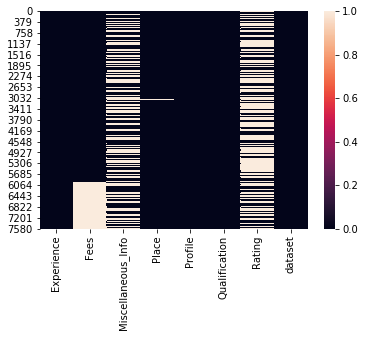

In [11]:
#heatmap for null values
sns.heatmap(df.isnull())

In [12]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values51



In [13]:
#drop duplictes values
df.drop_duplicates(inplace=True)
df.shape

(7897, 8)

In [14]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of Experience : 64
number of unique valuse of Fees : 40
number of unique valuse of Miscellaneous_Info : 3980
number of unique valuse of Place : 948
number of unique valuse of Profile : 6
number of unique valuse of Qualification : 1801
number of unique valuse of Rating : 52
number of unique valuse of dataset : 2


In [15]:
# Check if ? is present
for col in df:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")


? in Experience: 0
? in Fees: 0
? in Miscellaneous_Info: 0
? in Place: 0
? in Profile: 0
? in Qualification: 0
? in Rating: 0
? in dataset: 0


In [16]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [17]:
#calculating total and percentage of all objects fields
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')

--------------------Experience-------------------------
                     total   percent
9 years experience     419  0.053058
10 years experience    404  0.051159
8 years experience     378  0.047866
11 years experience    372  0.047106
12 years experience    358  0.045334
...                    ...       ...
64 years experience      1  0.000127
61 years experience      1  0.000127
60 years experience      1  0.000127
58 years experience      1  0.000127
66 years experience      1  0.000127

[64 rows x 2 columns]


--------------------Miscellaneous_Info-------------------------
                                                    total   percent
Acrylic Partial Denture Crowns and Bridges Fixi...     50  0.006332
Skin Allergy Treatment Skin Allergies Dermabrasion     18  0.002279
Tooth Extraction Dental Fillings Scaling / Poli...     16  0.002026
Dental Fillings Zirconia Crowns Dental Implant ...     15  0.001899
Dermabrasion Laser Resurfacing Acne / Pimples T...     14  0.001773
...

In [18]:
#lets describe the dataset
df.describe(include=['object', 'bool'])

,Experience,Miscellaneous_Info,Place,Profile,Qualification,Rating,dataset
count,7897,4493,7894,7897,7897,3556,7897
unique,64,3980,948,6,1801,52,2
top,9 years experience,Acrylic Partial Denture Crowns and Bridges Fix...,"Andheri West, Mumbai",Dentist,BDS,100%,train
freq,419,50,97,1832,626,907,5921


Looks like all the categorical variables have lot of levels associated with them (except for 'Profile'). We may have to group them and engineer new features based on certain keywords and rules.

# Feature Generation

In [19]:
#Lets  check the value counts of objects
for col in cat_col.index:
        print(df[col].value_counts())
        print()

9 years experience     419
10 years experience    404
8 years experience     378
11 years experience    372
12 years experience    358
                      ... 
64 years experience      1
61 years experience      1
60 years experience      1
58 years experience      1
66 years experience      1
Name: Experience, Length: 64, dtype: int64

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth     50
Skin Allergy Treatment Skin Allergies Dermabrasion                     18
Tooth Extraction Dental Fillings Scaling / Polishing                   16
Dental Fillings Zirconia Crowns Dental Implant Fixing                  15
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                14
                                                                       ..
99% 31 Feedback Secunderabad, Hyderabad                                 1
Allergy Treatment Bronchial Asthma Treatment Kidney Stone Treatment     1
98% 105 Feedback Vanasthalipuram, Hyderabad                        

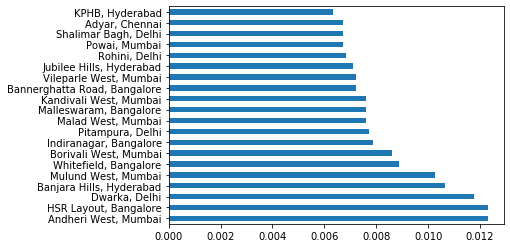

In [20]:
##----------------Place-------------------------------------------##
#Lets plot the Counts of place
df['Place'].value_counts(normalize=True)[:20].plot(kind='barh')

In [21]:
#Extracting features from Place and splitting them into Area and City 
df['Area']=df['Place'].str.split(',').str[0]
df['City']=df['Place'].str.split(',').str[1]
df.head(10)


,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,dataset,Area,City
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train,Kakkanad,Ernakulam
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train,Whitefield,Bangalore
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train,Mathikere - BEL,Bangalore
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train,Bannerghatta Road,Bangalore
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train,Keelkattalai,Chennai
5,8 years experience,100.0,NaN,"Porur, Chennai",Ayurveda,BAMS,NaN,train,Porur,Chennai
6,42 years experience,200.0,NaN,"Karol Bagh, Delhi",Homeopath,BHMS,NaN,train,Karol Bagh,Delhi
7,10 years experience,200.0,Dental Fillings Crowns and Bridges Fixing Impa...,"Arekere, Bangalore",Dentist,BDS,99%,train,Arekere,Bangalore
8,14 years experience,100.0,NaN,"Old City, Hyderabad",General Medicine,"MBBS, MD - General Medicine",NaN,train,Old City,Hyderabad
9,23 years experience,100.0,NaN,"Athani, Ernakulam",Dentist,"BSc, BDS",NaN,train,Athani,Ernakulam


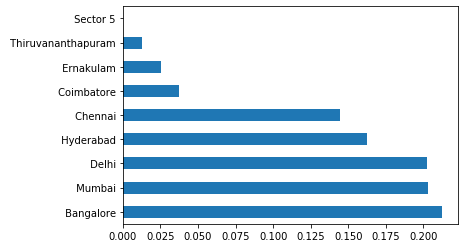

In [22]:
#Lets plot the Counts of City

df['City'].value_counts(normalize=True).plot(kind='barh')


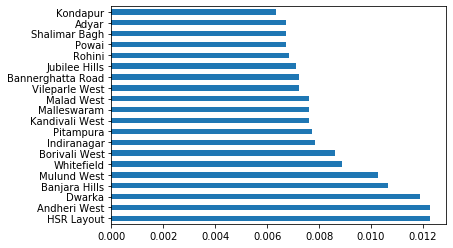

In [23]:
#Lets plot the Counts of Area
df['Area'].value_counts(normalize=True)[:20].plot(kind='barh')


In [24]:
#Checking Null values in city and area
print("Null values in City",df.City.isnull().sum())
print("Null values in Area",df.Area.isnull().sum())

Null values in City 4
Null values in Area 3


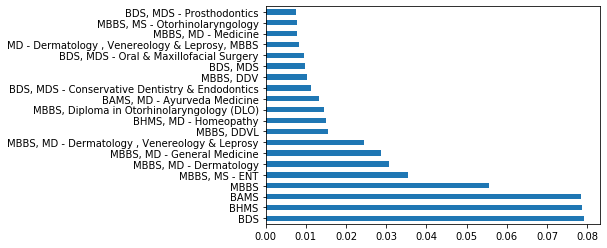

In [25]:
##--------------------------Qualification------------------------------------------------##
#Lets plot the Counts of Qualification
df['Qualification'].value_counts(normalize=True)[:20].plot(kind='barh')


We need to seperate the degree and the specialization from this variable



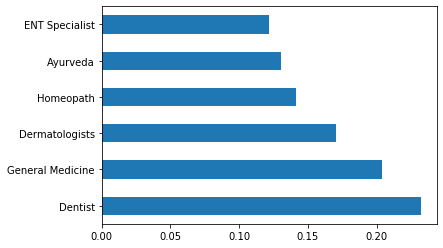

In [26]:
##--------------------------Profile------------------------------------------------##
#Lets plot the Counts of Profile
df['Profile'].value_counts(normalize=True).plot(kind='barh')


In [27]:
# Checking the relation between Qualification and profile
df_qual_prof = pd.crosstab(df.Qualification, df.Profile, margins=True)
df_qual_prof.head()

Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Qualification,,,,,,,
39 years experience,0,0,0,0,1,0,1
"Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics",0,1,0,0,0,0,1
"Ayurvedic panchkarma, BAMS",1,0,0,0,0,0,1
"B.Ac, BEMS",0,0,0,0,0,1,1
"B.Sc, BAMS",2,0,0,0,0,0,2


In [28]:
df_qual_prof.sort_values(by=['All'], ascending=False)


Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Qualification,,,,,,,
All,1031,1832,1345,962,1613,1114,7897
BDS,0,626,0,0,0,0,626
BHMS,0,0,1,0,0,621,622
BAMS,619,0,0,0,0,1,620
MBBS,0,0,8,6,424,0,438
...,...,...,...,...,...,...,...
"DNB - ENT, MS - ENT, DORL (ENT), FCPS - Oto-Rhino-Laryngology, MRCS (UK), MBBS",0,0,0,1,0,0,1
"DNB - ENT, MD - Physician",0,0,0,1,0,0,1
"DNB - ENT, MBBS, Diploma in Otorhinolaryngology (DLO)",0,0,0,1,0,0,1


My aim here is to create certain levels within 'Profile' variable using the 'Qualification' variable.



In [29]:
#Deepdive into medical specializations - creating flags based on degree and specializations
#Syntax: Series.str.match(pat, case=True, flags=0, na=nan)
##-----------Extracting features from qualification using Profile---------------------------##
'''Parameter :
pat : Regular expression pattern with capturing groups.
case : If True, case sensitive
flags : A re module flag, for example re.IGNORECASE.
na : default NaN, fill value for missing values
#df = df[['Qualification','Profile']]
'''

# Ayurveda
df['ayurveda_bams'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bBAMS\b'),1,0)
df['ayurveda_ms'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ayurveda_md'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMD\b'),1,0)

# Dentist
df['dentist_bds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bBDS\b'),1,0)
df['dentist_mds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bMDS\b'),1,0)
df['dentist_orthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'orthodon', case=False),1,0)
df['dentist_periodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'periodon', case=False),1,0)
df['dentist_prosthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'prosthodon', case=False),1,0)
df['dentist_oralandmaxi'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'Oral & Maxillofacial Surgery', case=False),1,0)
df['dentist_cosmetic'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

# Dermatology
df['dermatology_md'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['dermatology_venereology'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDV\b') | df.Qualification.str.contains(r'venereology', case=False)),1,0)
df['dermatology_leprosy'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDVL\b') | df.Qualification.str.contains(r'leprosy', case=False)),1,0)
df['dermatology_dnb'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bDNB\b'),1,0)
df['dermatology_cosmetic'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

# ENT - MS, Otorhinolaryngology, Oncology
df['ent_ms'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ent_otorhinolaryngology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'otorhinolaryngology', case=False),1,0)
df['ent_oncology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'oncology', case=False),1,0)

# Homeopathy - BHMS, DHMS, MD
df['homeopath_bhms'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bBHMS\b'),1,0)
df['homeopath_dhms'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bDHMS\b'),1,0)
df['homeopath_md'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bMD\b'),1,0)

# GM - Cardiology, Orthopedic Surgery, Gastroenterology, Urology, Dermatology, Anesthesiology, Plastic Surgery, Radiology, Emergency Medicine, General Surgery, Diabetology, Child/Pediatrics, Tuberculosis and Chest Diseases, Pharmacology, Maternity, Obstetrics & Gynaecology, Pathology, Pulmonary, Nephrology, Neurology, Sports, Oncology, Acupuncture, Psychiatry, Endocrinology, breast, Rheumatology, Ophthalmology/Opthalmology
df['gm_md'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['gm_cardio'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'cardio', case=False),1,0)
df['gm_surgery'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'surgery', case=False),1,0)
df['gm_diabet'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'diabet', case=False),1,0)
df['gm_child'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'child', case=False) | df.Qualification.str.contains(r'pediat', case=False)),1,0)
df['gm_chest'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'chest', case=False) | df.Qualification.str.contains(r'tuber', case=False)),1,0)
df['gm_obstet'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'obstet', case=False) | df.Qualification.str.contains(r'gyna', case=False)),1,0)
df['gm_pulmonary'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'pulmonary', case=False),1,0)
df['gm_psych'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'psych', case=False),1,0)
df['gm_endocrin'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'endocrin', case=False),1,0)
df['gm_rheum'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'rheum', case=False),1,0)

df[df.Profile == 'Ayurveda'].head(100)
#df.head(100)

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,dataset,Area,City,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train,Whitefield,Bangalore,...,0,0,0,0,0,0,0,0,0,0
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train,Bannerghatta Road,Bangalore,...,0,0,0,0,0,0,0,0,0,0
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train,Keelkattalai,Chennai,...,0,0,0,0,0,0,0,0,0,0
5,8 years experience,100.0,NaN,"Porur, Chennai",Ayurveda,BAMS,NaN,train,Porur,Chennai,...,0,0,0,0,0,0,0,0,0,0
11,7 years experience,100.0,NaN,"Somajiguda, Hyderabad",Ayurveda,BAMS,NaN,train,Somajiguda,Hyderabad,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,13 years experience,200.0,"98% 17 Feedback AS Rao Nagar, Hyderabad","AS Rao Nagar, Hyderabad",Ayurveda,"BAMS, MS - Ayurveda, MSc - Psychology",98%,train,AS Rao Nagar,Hyderabad,...,0,0,0,0,0,0,0,0,0,0
718,15 years experience,200.0,NaN,"J.C Nagar, Bangalore",Ayurveda,"MD - Ayurvedic Pharmacology, BAMS",100%,train,J.C Nagar,Bangalore,...,0,0,0,0,0,0,0,0,0,0
723,8 years experience,500.0,NaN,"Naraina Vihar, Delhi",Ayurveda,BAMS,NaN,train,Naraina Vihar,Delhi,...,0,0,0,0,0,0,0,0,0,0
735,16 years experience,50.0,NaN,"Bhayandar East, Mumbai",Ayurveda,BAMS,NaN,train,Bhayandar East,Mumbai,...,0,0,0,0,0,0,0,0,0,0


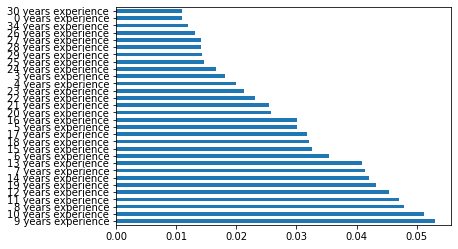

In [30]:
##----------------Experience-------------------------------------------##
#Lets plot the Counts of Experience
df['Experience'].value_counts(normalize=True)[:30].plot(kind='barh')


In [31]:
#Extracting features from Expereience replacing years experience with '' and then converting it in integer.
df['Experience'] = df['Experience'].str.replace(' years experience','').astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7897 entries, 0 to 7947
Data columns (total 42 columns):
Experience                 7897 non-null int64
Fees                       5921 non-null float64
Miscellaneous_Info         4493 non-null object
Place                      7894 non-null object
Profile                    7897 non-null object
Qualification              7897 non-null object
Rating                     3556 non-null object
dataset                    7897 non-null object
Area                       7894 non-null object
City                       7893 non-null object
ayurveda_bams              7897 non-null int32
ayurveda_ms                7897 non-null int32
ayurveda_md                7897 non-null int32
dentist_bds                7897 non-null int32
dentist_mds                7897 non-null int32
dentist_orthodontics       7897 non-null int32
dentist_periodontics       7897 non-null int32
dentist_prosthodontics     7897 non-null int32
dentist_oralandmaxi        7897 non-n

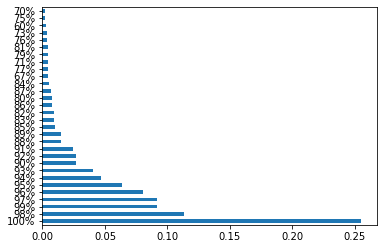

In [32]:
#Lets plot the Counts of Rating
df['Rating'].value_counts(normalize=True)[:30].plot(kind='barh')


count    3556.000000
mean       94.592520
std         7.783725
min         7.000000
25%        93.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: Rating, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B32587B88>]],
      dtype=object)

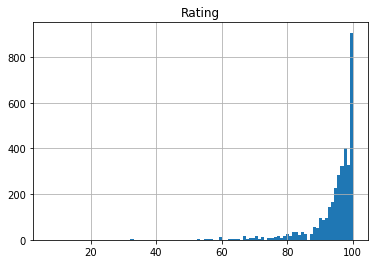

In [33]:
#In rating we are replacing % with '' and convert it into float type
df['Rating'] = df['Rating'].str.replace('%','').astype('float64')
print(df['Rating'].describe())
df.hist(column='Rating', bins=100)

In [34]:
#checking relation of Rating with Miscellaneous_Info
df[['Rating','Miscellaneous_Info']].head(100)


,Rating,Miscellaneous_Info
0,100.0,"100% 16 Feedback Kakkanad, Ernakulam"
1,98.0,"98% 76 Feedback Whitefield, Bangalore"
2,NaN,NaN
3,NaN,"Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb"
4,100.0,"100% 4 Feedback Keelkattalai, Chennai"
...,...,...
95,100.0,Pediaterics Skin Disorder Kidney Stone Treatment
96,97.0,General dermatology Botox Injections Skin Boosters and Fillers
97,NaN,NaN
98,NaN,NaN


Looks like rating is a derived column of Misc_info.
Rating is more missing than Misc_info because some of Misc_info doesn't contain rating of the doctor
Also, it looks like Misc_info is a combination of Rating, # Reviewers and Comments

In [35]:
##---------------------------------------Miscellaneous_Info-----------------##
#Miscellaneous_Info is a special information unique to the doctor,so its impossible to impute it
#So we will drop replace null values as missing
#Extracting feedback from  Miscellaneous_Info
df["Miscellaneous_Info"].fillna("missing",inplace=True)
#importing regex 
import re
def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

df['Feedback'] = df['Miscellaneous_Info'].apply(get_feedback)
df['Feedback'] = df['Feedback'].str.replace(' Feedback','')
df['Feedback'] = df['Feedback'].astype(int)

In [36]:
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text != []:
        return text[0]
    else:
        return 0
#Extracting Misc_Fees from Miscellaneous_Info
df['Misc_Fees'] = df['Miscellaneous_Info'].apply(get_fee)
df['Misc_Fees'] = df['Misc_Fees'].str.replace('₹','')
df['Misc_Fees'].fillna(50, inplace=True)
df['Misc_Fees'] = df['Misc_Fees'].astype(int)

def clean_misc(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['Miscellaneous_Info'] = df['Miscellaneous_Info'].apply(clean_misc)
df['Miscellaneous_Info'] = df['Miscellaneous_Info'].apply(clean_misc)

In [37]:
#Checking features after Extracting features from all the columns..
df.columns

Index(['Experience', 'Fees', 'Miscellaneous_Info', 'Place', 'Profile',
       'Qualification', 'Rating', 'dataset', 'Area', 'City', 'ayurveda_bams',
       'ayurveda_ms', 'ayurveda_md', 'dentist_bds', 'dentist_mds',
       'dentist_orthodontics', 'dentist_periodontics',
       'dentist_prosthodontics', 'dentist_oralandmaxi', 'dentist_cosmetic',
       'dermatology_md', 'dermatology_venereology', 'dermatology_leprosy',
       'dermatology_dnb', 'dermatology_cosmetic', 'ent_ms',
       'ent_otorhinolaryngology', 'ent_oncology', 'homeopath_bhms',
       'homeopath_dhms', 'homeopath_md', 'gm_md', 'gm_cardio', 'gm_surgery',
       'gm_diabet', 'gm_child', 'gm_chest', 'gm_obstet', 'gm_pulmonary',
       'gm_psych', 'gm_endocrin', 'gm_rheum', 'Feedback', 'Misc_Fees'],
      dtype='object')

In [38]:
#Dropping 'Place','Qualification','Miscellaneous_Info'
df.drop(['Place','Qualification','Miscellaneous_Info'],axis=1,inplace=True)
df.dtypes

Experience                 int64  
Fees                       float64
Profile                    object 
Rating                     float64
dataset                    object 
Area                       object 
City                       object 
ayurveda_bams              int32  
ayurveda_ms                int32  
ayurveda_md                int32  
dentist_bds                int32  
dentist_mds                int32  
dentist_orthodontics       int32  
dentist_periodontics       int32  
dentist_prosthodontics     int32  
dentist_oralandmaxi        int32  
dentist_cosmetic           int32  
dermatology_md             int32  
dermatology_venereology    int32  
dermatology_leprosy        int32  
dermatology_dnb            int32  
dermatology_cosmetic       int32  
ent_ms                     int32  
ent_otorhinolaryngology    int32  
ent_oncology               int32  
homeopath_bhms             int32  
homeopath_dhms             int32  
homeopath_md               int32  
gm_md               

In [39]:
#Checking missing values
df.isna().sum()

Experience                 0   
Fees                       1976
Profile                    0   
Rating                     4341
dataset                    0   
Area                       3   
City                       4   
ayurveda_bams              0   
ayurveda_ms                0   
ayurveda_md                0   
dentist_bds                0   
dentist_mds                0   
dentist_orthodontics       0   
dentist_periodontics       0   
dentist_prosthodontics     0   
dentist_oralandmaxi        0   
dentist_cosmetic           0   
dermatology_md             0   
dermatology_venereology    0   
dermatology_leprosy        0   
dermatology_dnb            0   
dermatology_cosmetic       0   
ent_ms                     0   
ent_otorhinolaryngology    0   
ent_oncology               0   
homeopath_bhms             0   
homeopath_dhms             0   
homeopath_md               0   
gm_md                      0   
gm_cardio                  0   
gm_surgery                 0   
gm_diabe

In [40]:
#Lets replace the null values in Rating with 0 and City,area with missing
df["Rating"].fillna(0,inplace=True)
df['City'].fillna('missing', inplace=True)
df['Area'].fillna('missing', inplace=True)


In [41]:
# check null values after tackel the missing values
df.isna().sum()

Experience                 0   
Fees                       1976
Profile                    0   
Rating                     0   
dataset                    0   
Area                       0   
City                       0   
ayurveda_bams              0   
ayurveda_ms                0   
ayurveda_md                0   
dentist_bds                0   
dentist_mds                0   
dentist_orthodontics       0   
dentist_periodontics       0   
dentist_prosthodontics     0   
dentist_oralandmaxi        0   
dentist_cosmetic           0   
dermatology_md             0   
dermatology_venereology    0   
dermatology_leprosy        0   
dermatology_dnb            0   
dermatology_cosmetic       0   
ent_ms                     0   
ent_otorhinolaryngology    0   
ent_oncology               0   
homeopath_bhms             0   
homeopath_dhms             0   
homeopath_md               0   
gm_md                      0   
gm_cardio                  0   
gm_surgery                 0   
gm_diabe

# Univarient Analysis

Experience                 AxesSubplot(0.125,0.816017;0.168478x0.0639831)   
Fees                       AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
Rating                     AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
ayurveda_bams              AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
ayurveda_ms                AxesSubplot(0.125,0.739237;0.168478x0.0639831)   
ayurveda_md                AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
dentist_bds                AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
dentist_mds                AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
dentist_orthodontics       AxesSubplot(0.125,0.662458;0.168478x0.0639831)   
dentist_periodontics       AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
dentist_prosthodontics     AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
dentist_oralandmaxi        AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
dentist_cosmetic           AxesSubplot(0.125,0.585678;0.168478x0.0639831)   

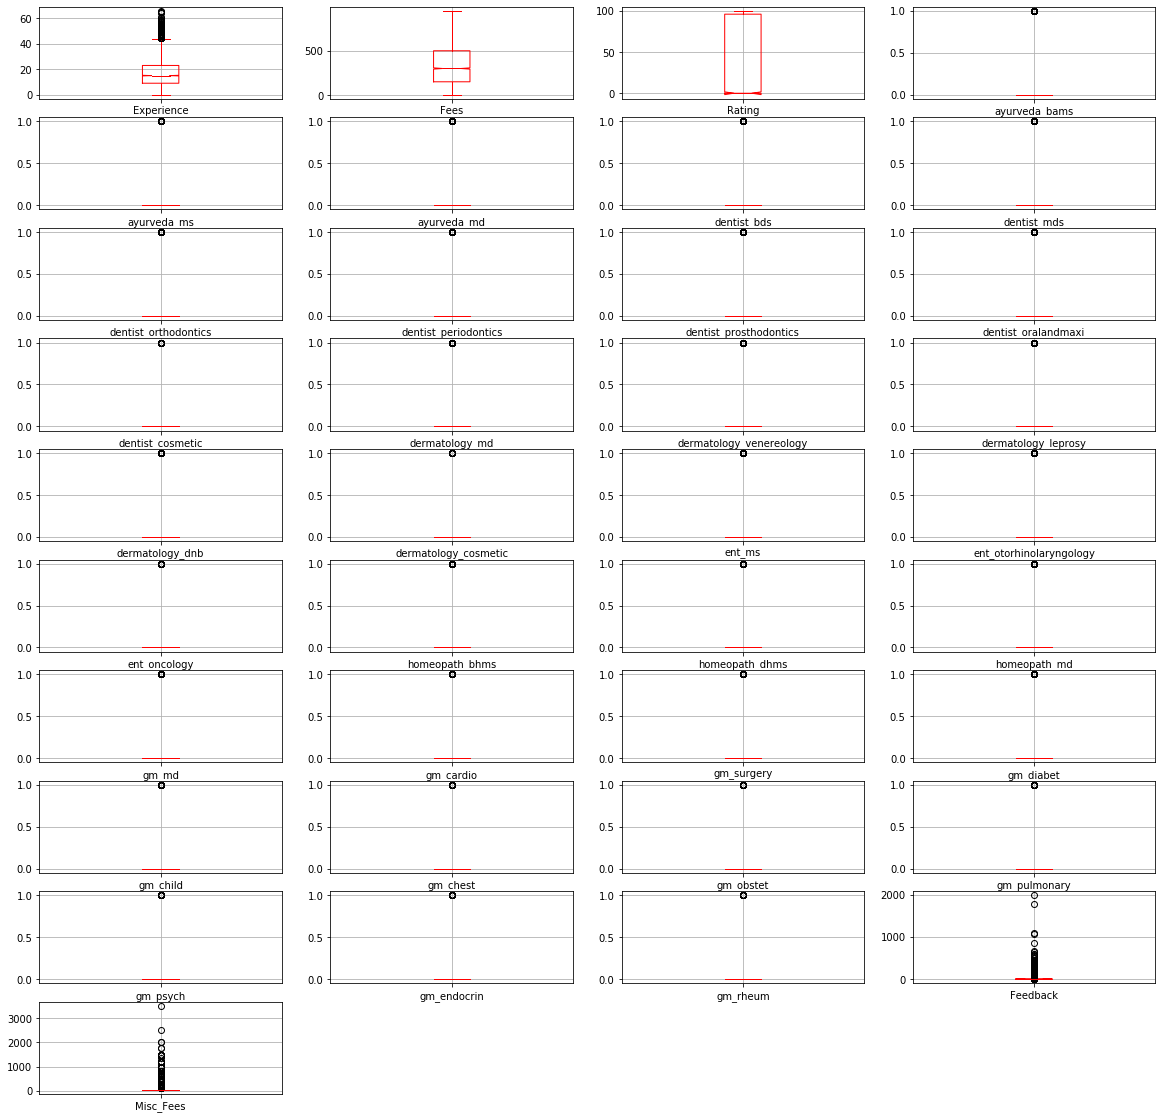

In [42]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(10,4),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B34889C48>,
      dtype=object)

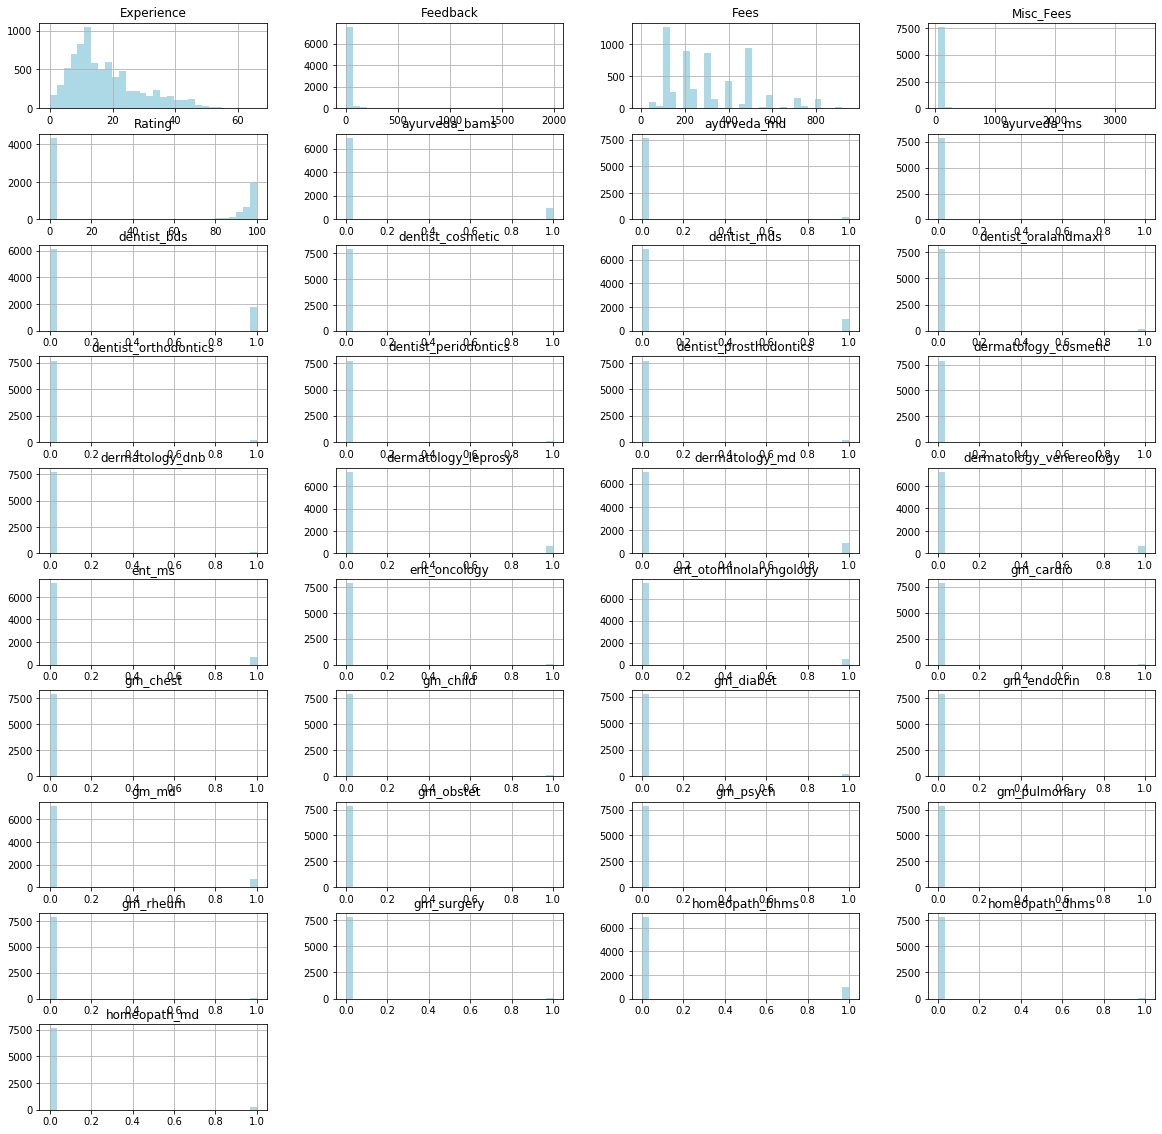

In [43]:
# Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(10,4),bins=30,color='lightblue')

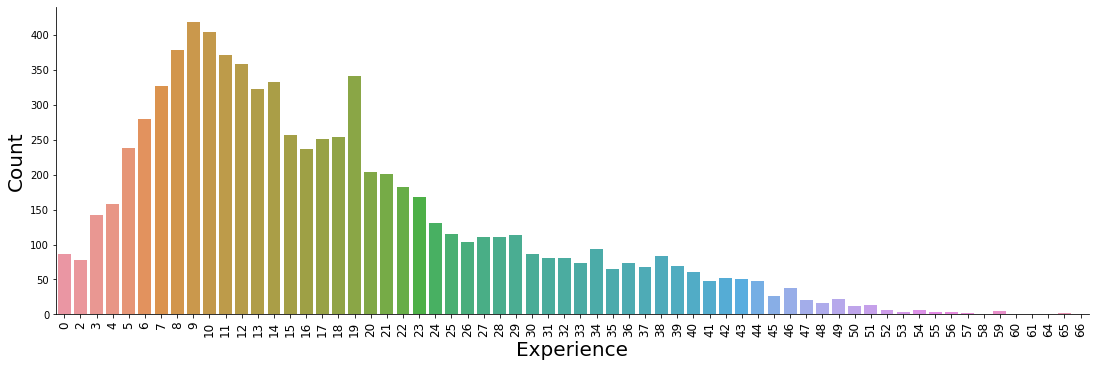

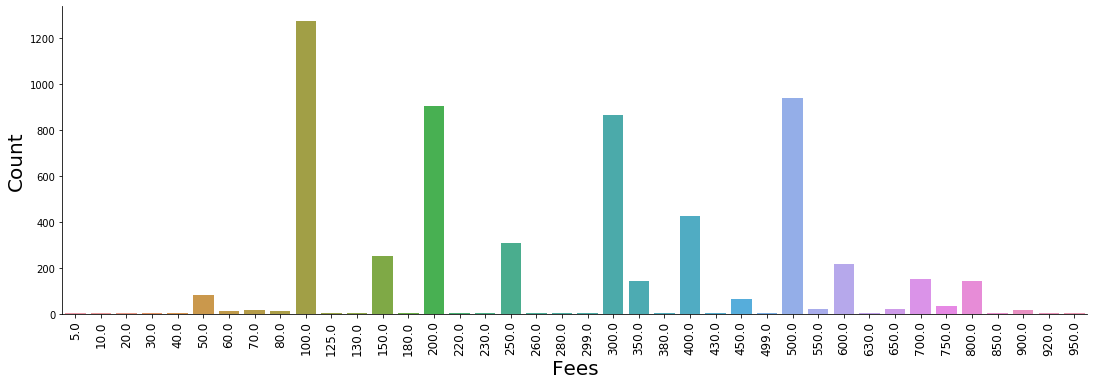

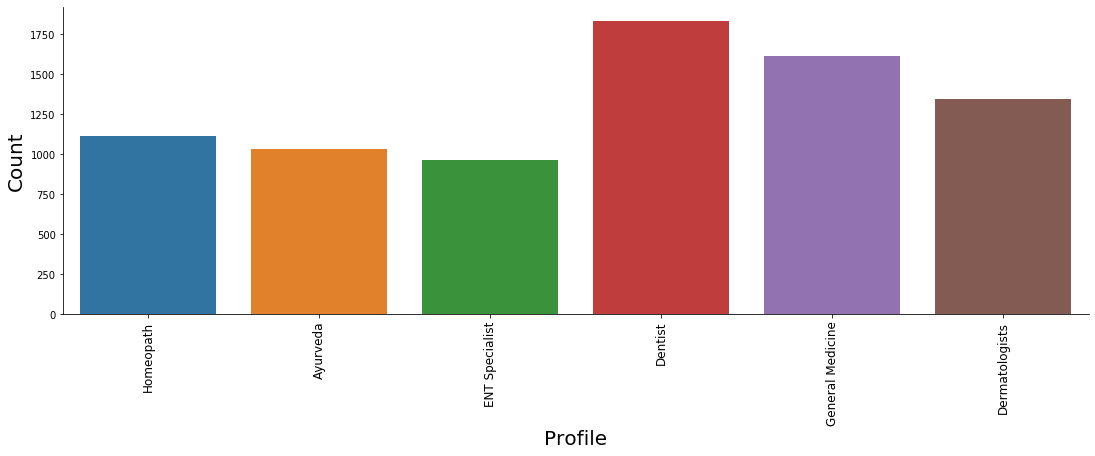

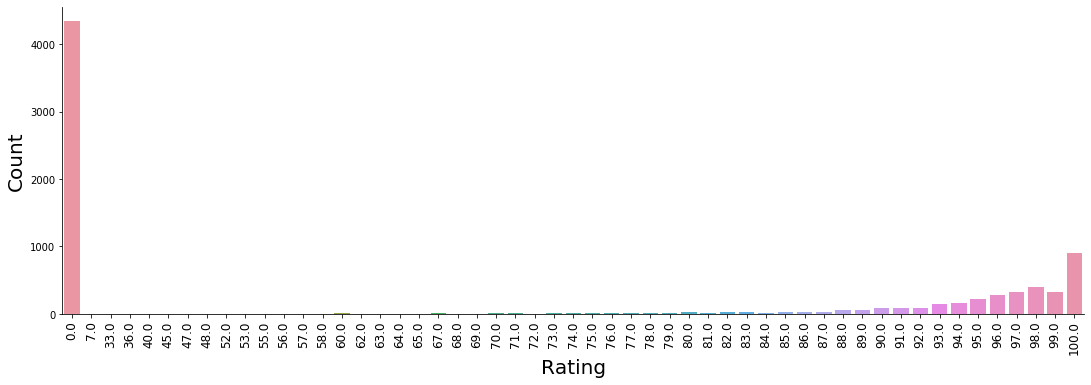

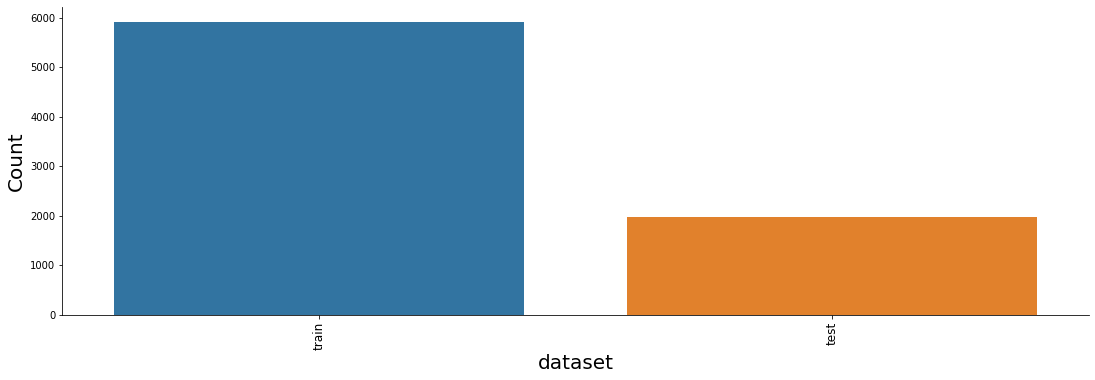

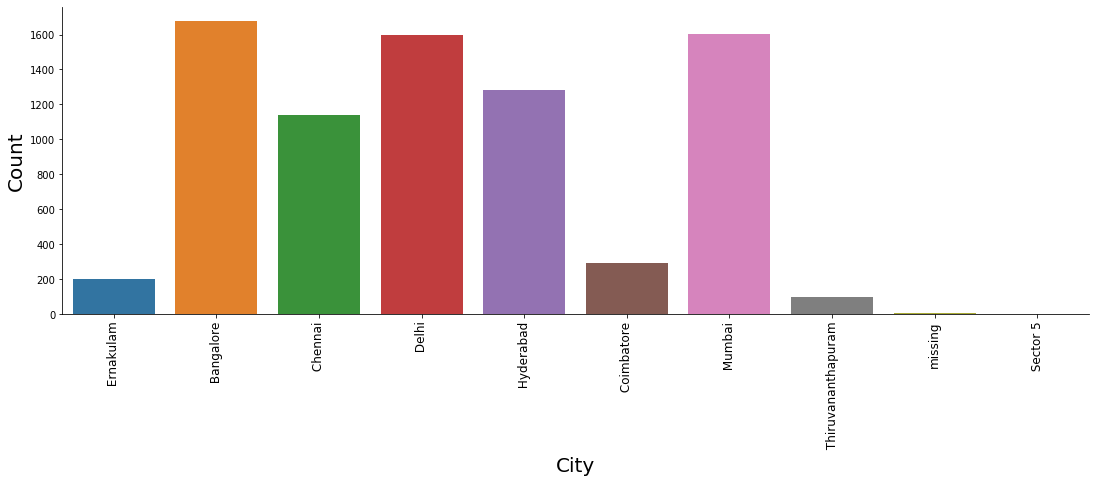

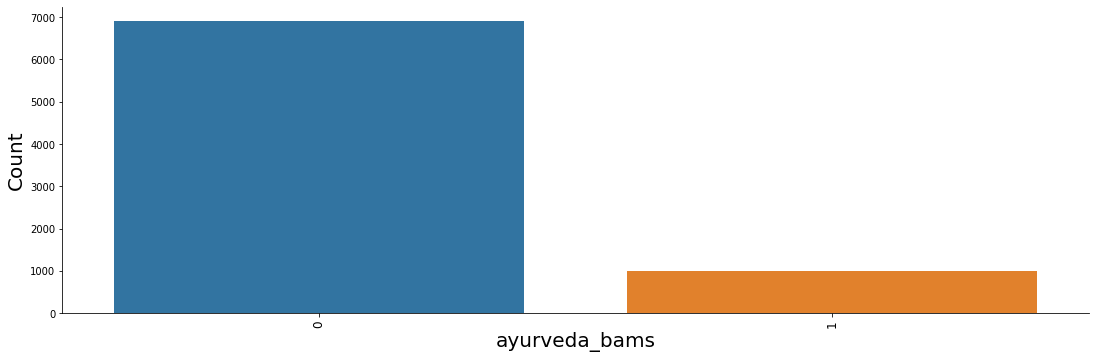

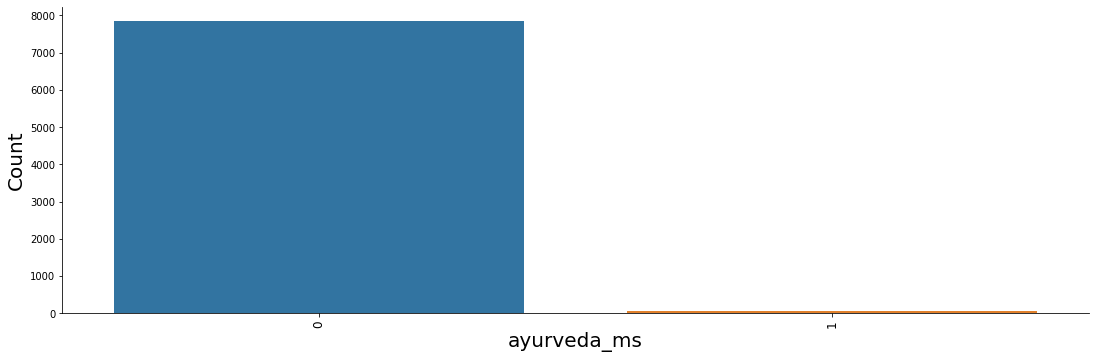

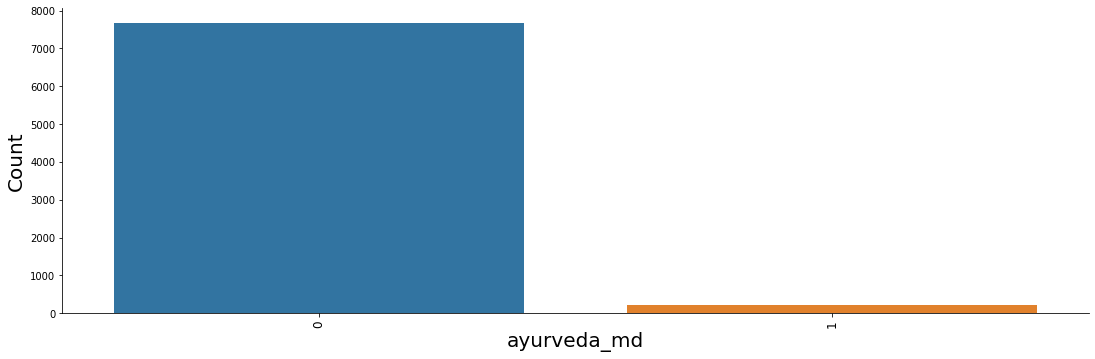

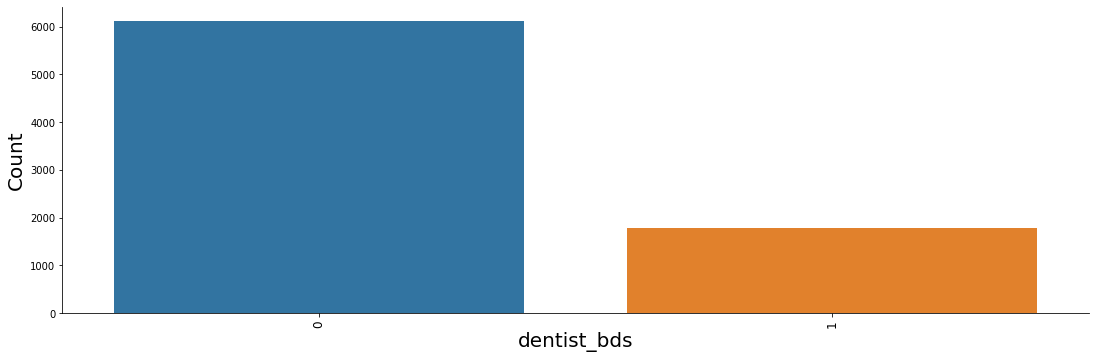

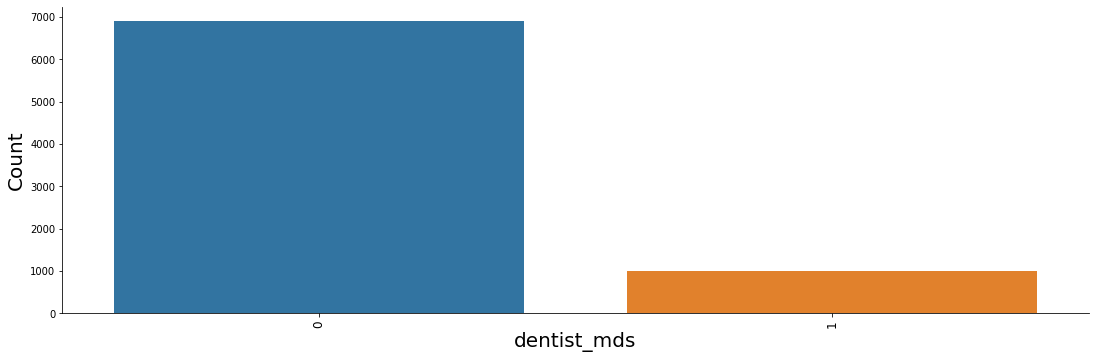

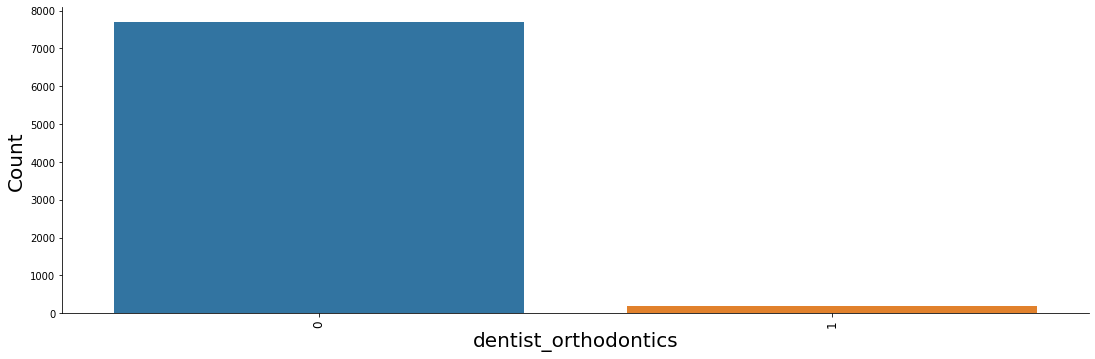

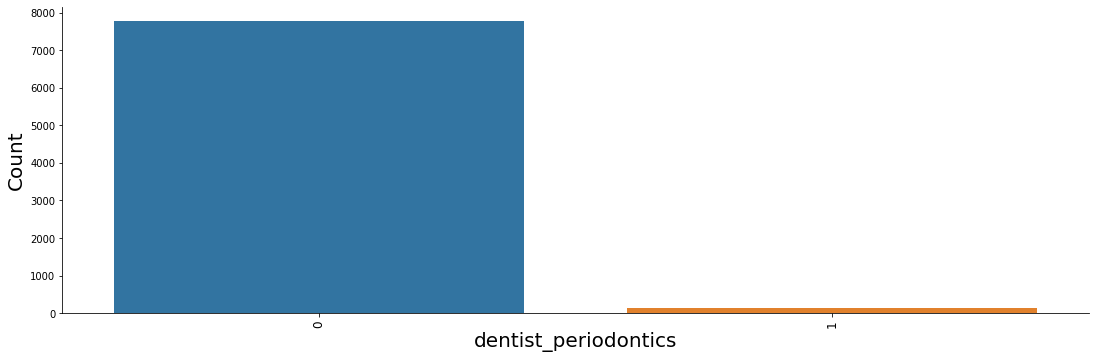

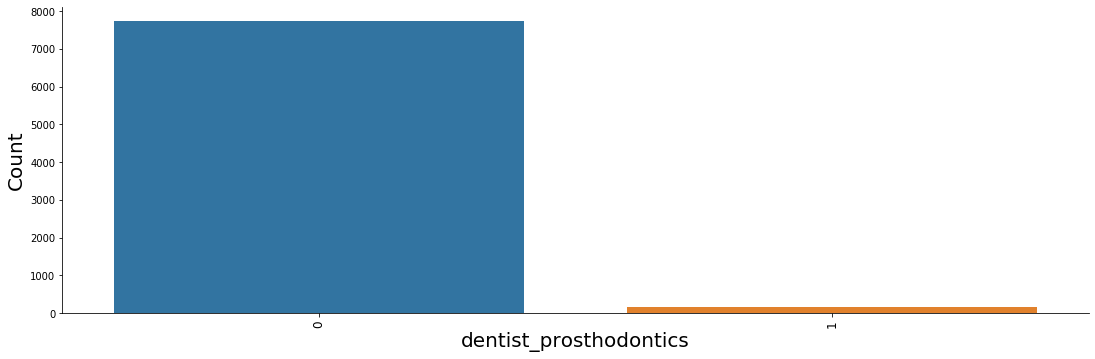

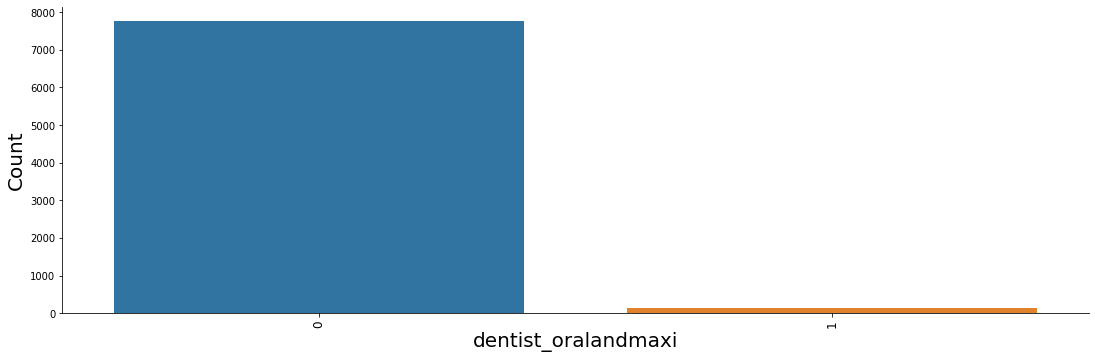

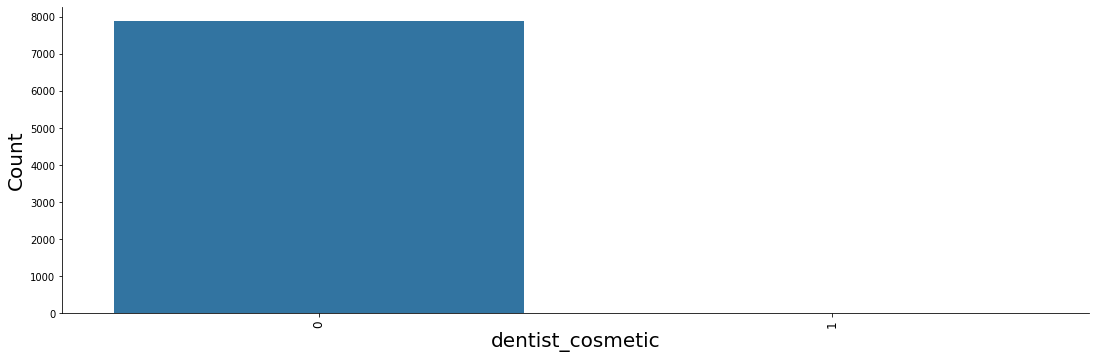

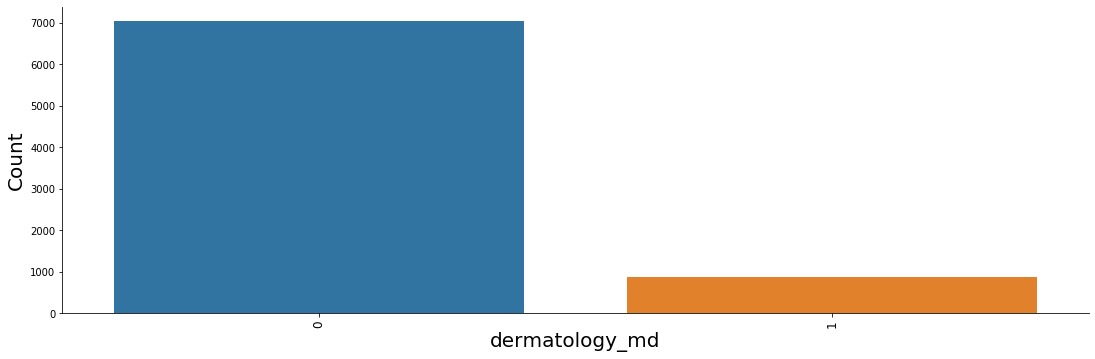

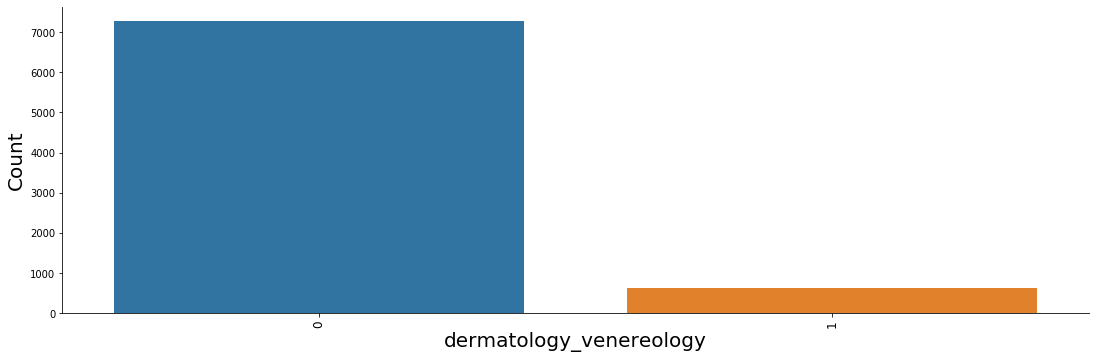

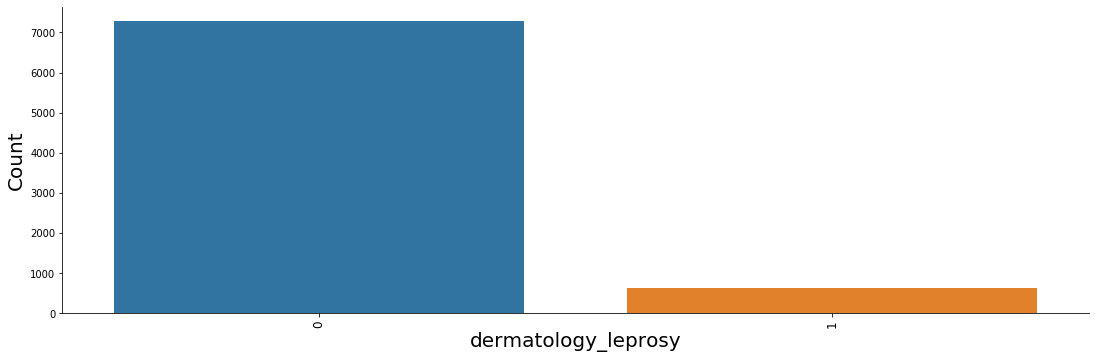

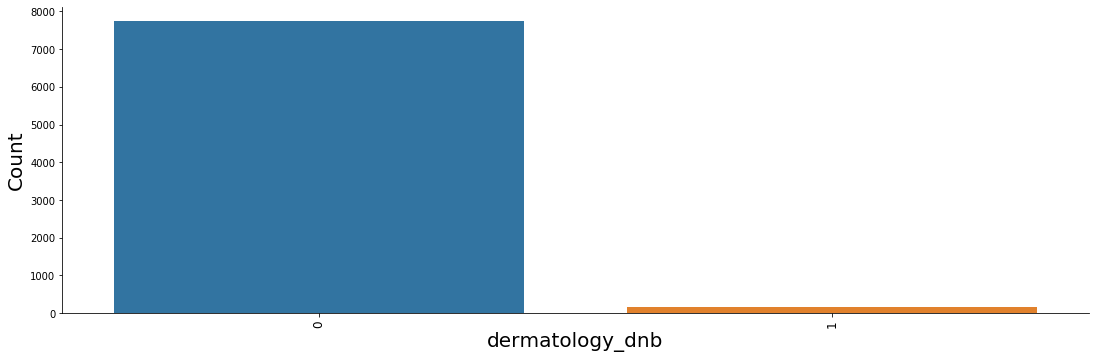

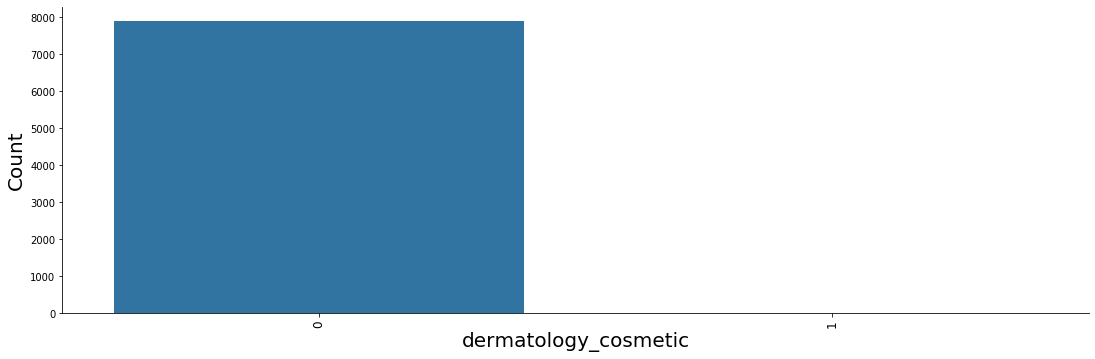

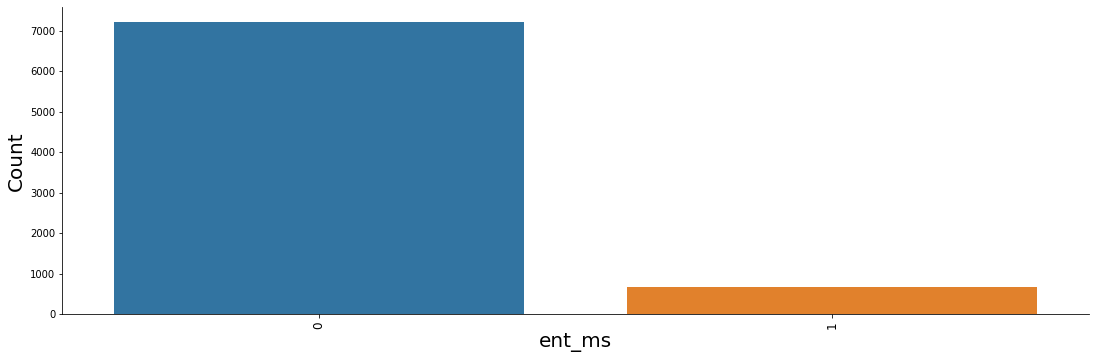

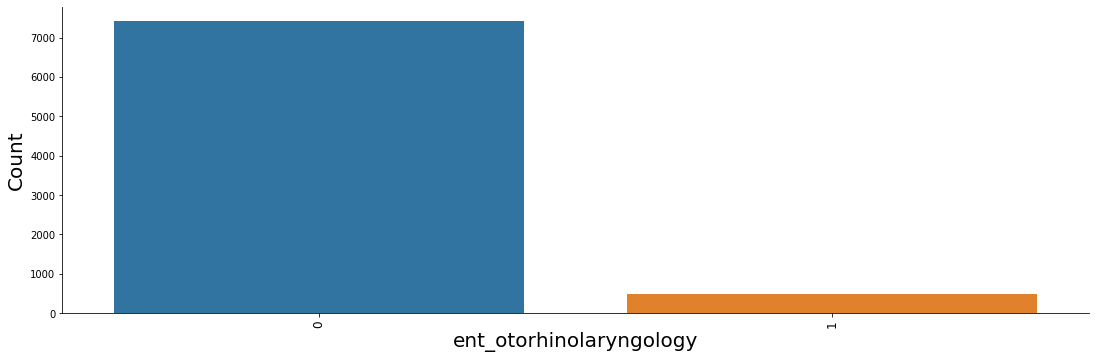

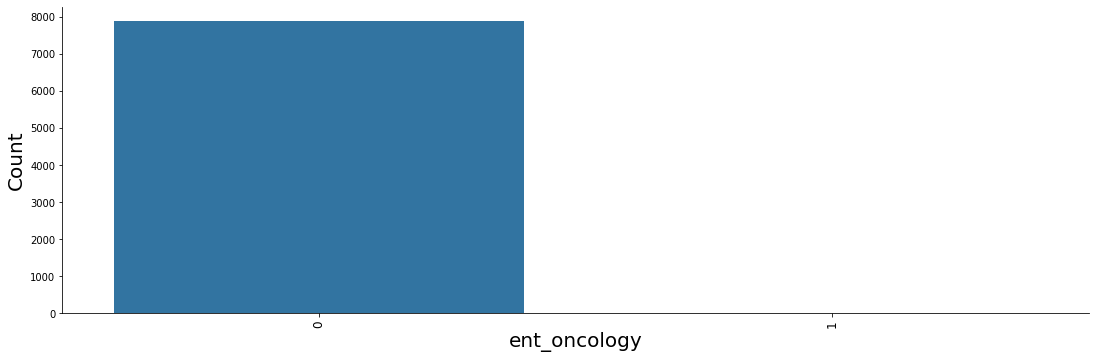

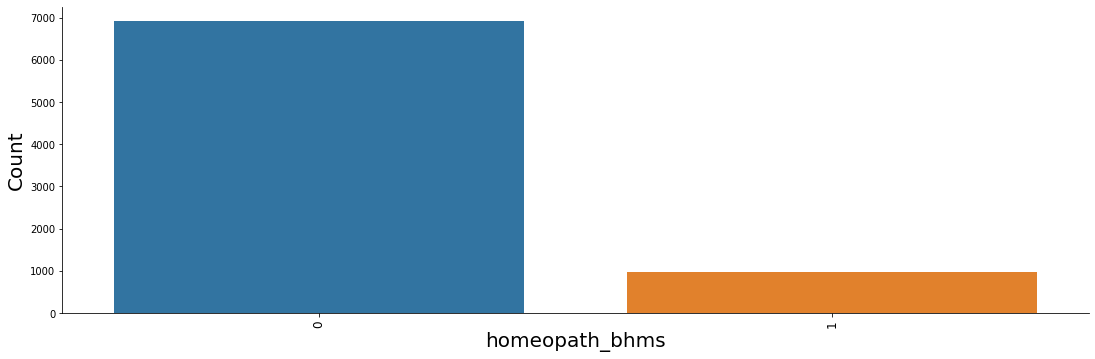

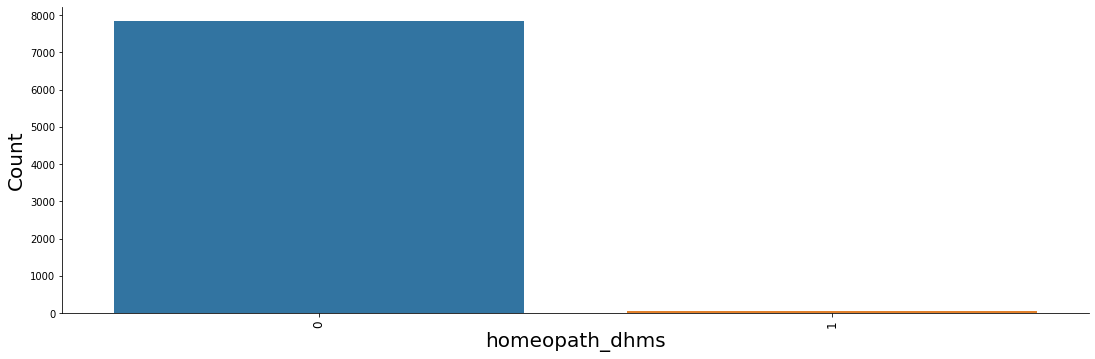

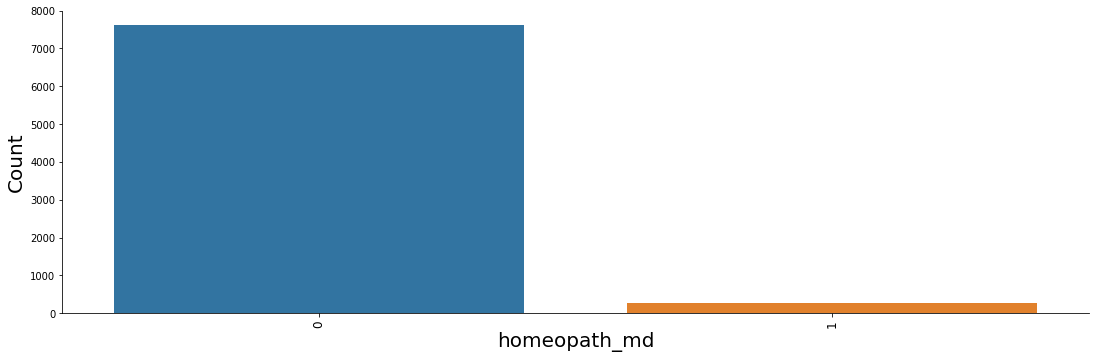

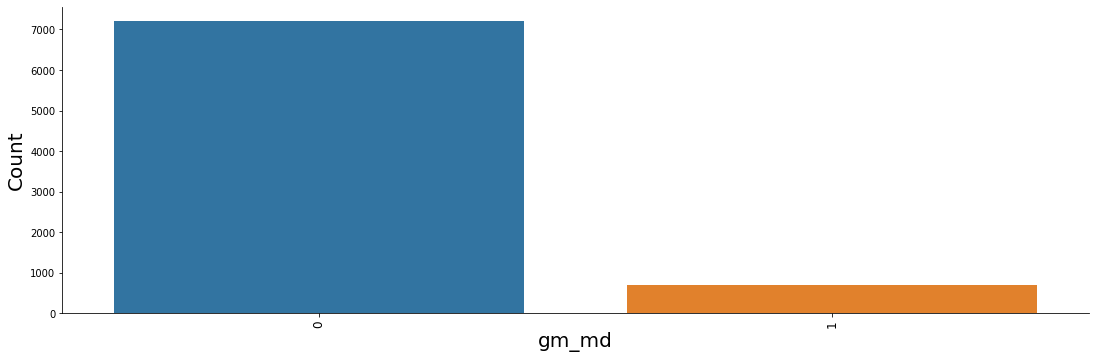

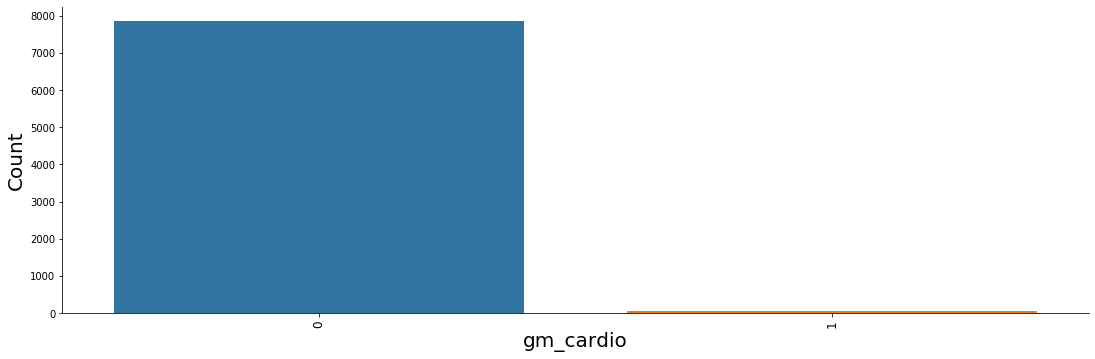

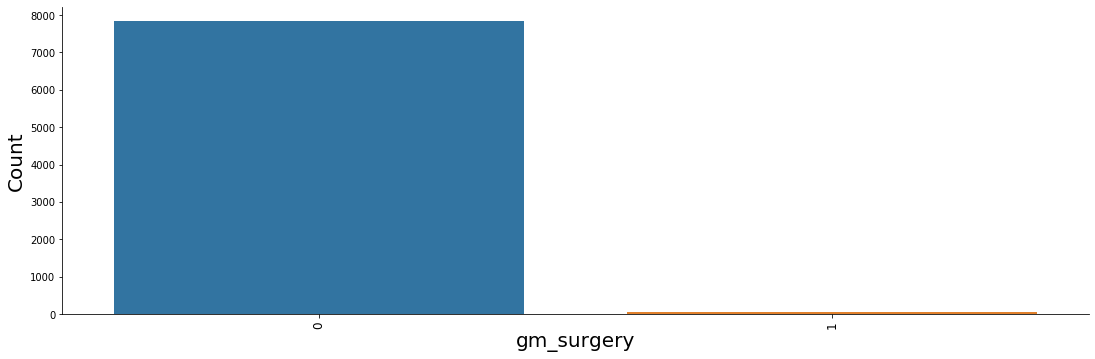

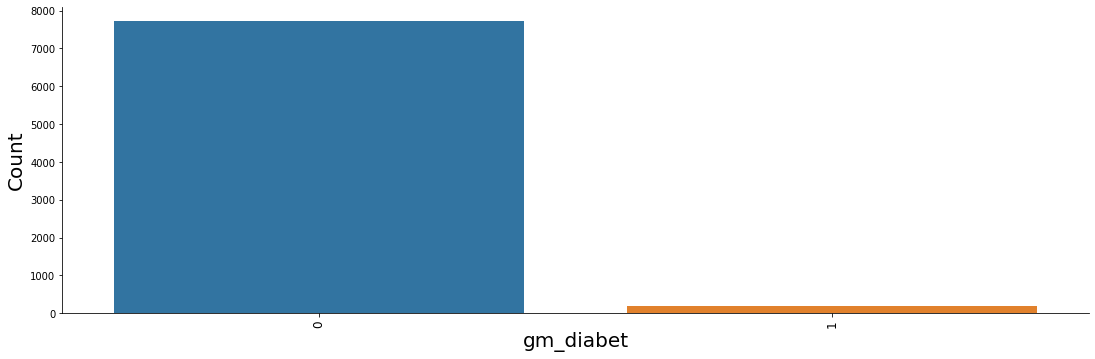

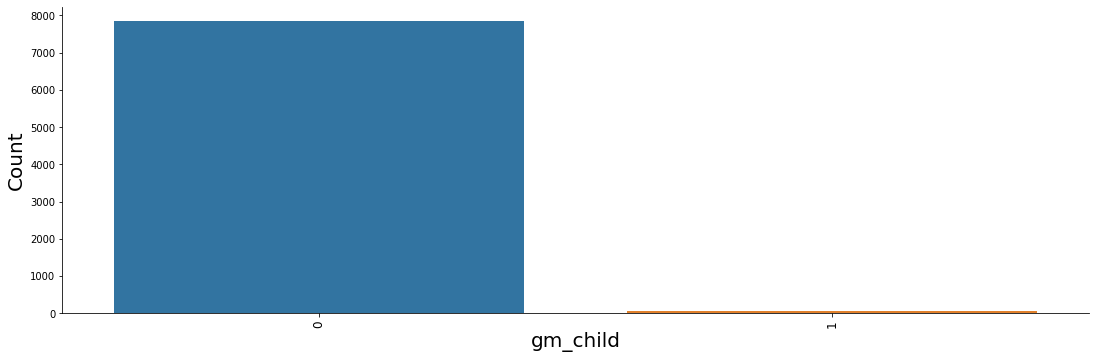

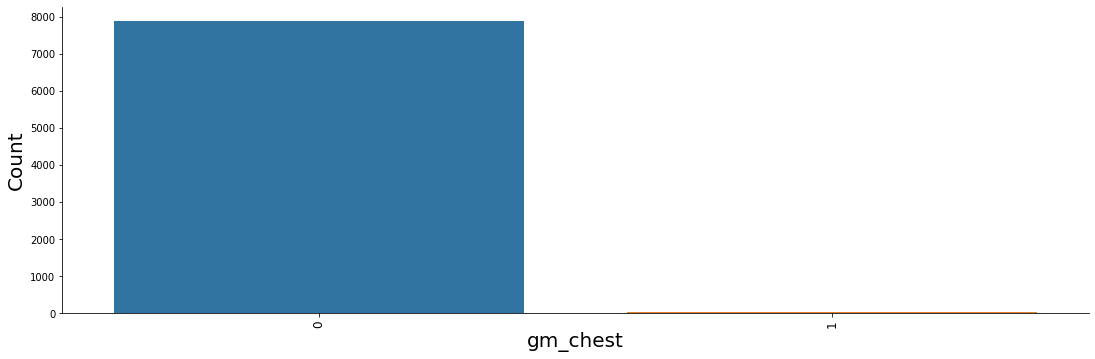

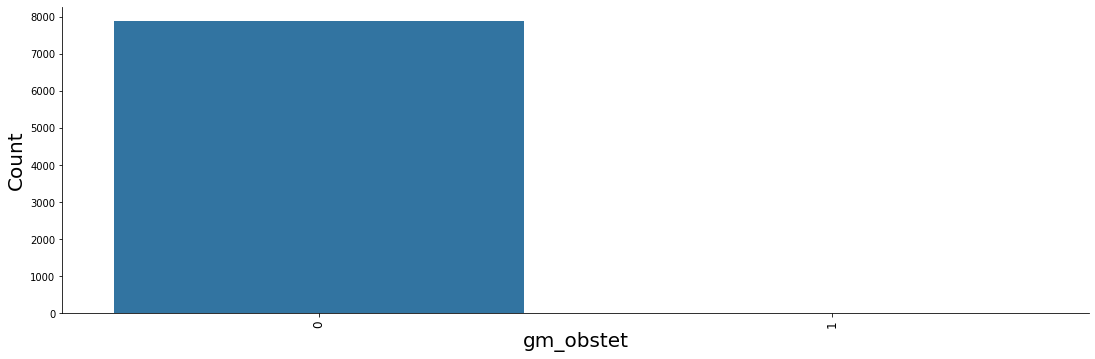

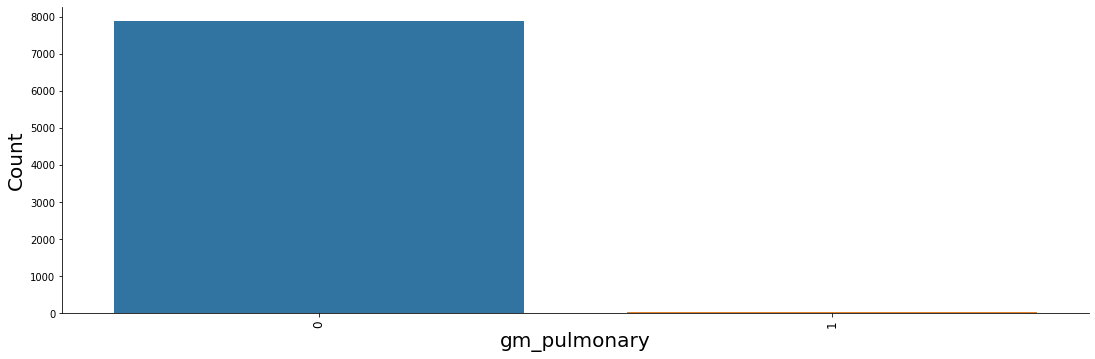

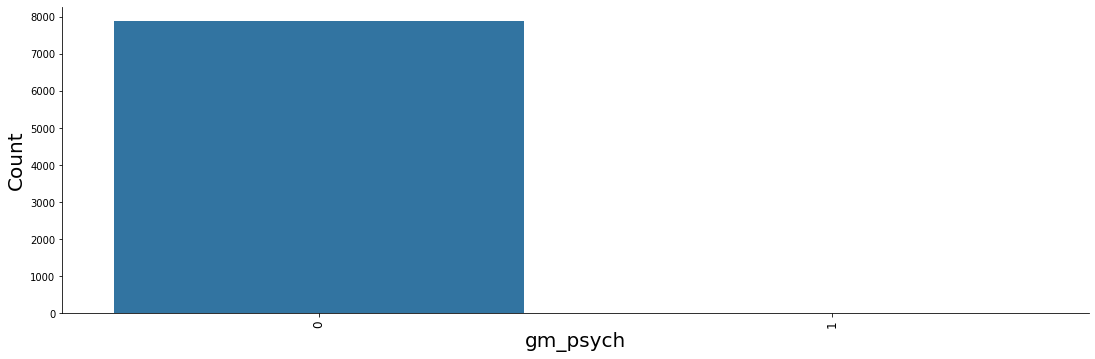

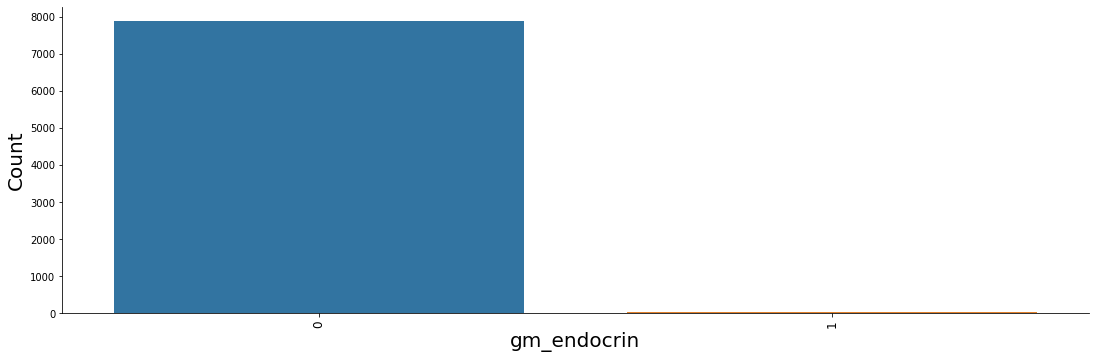

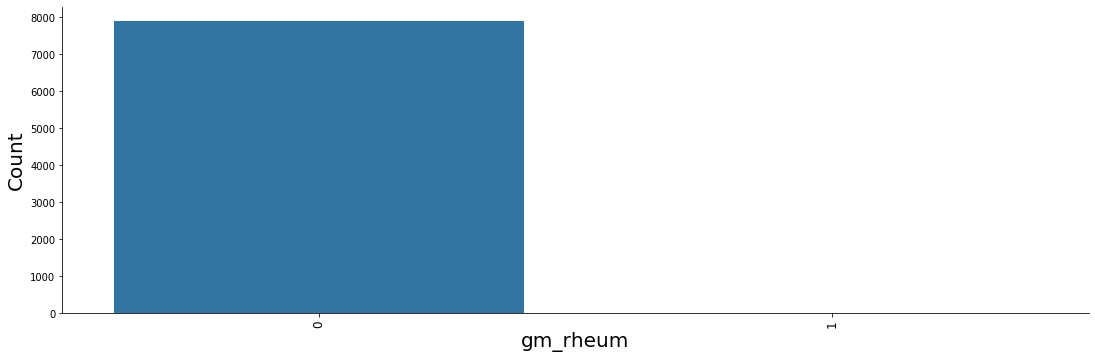

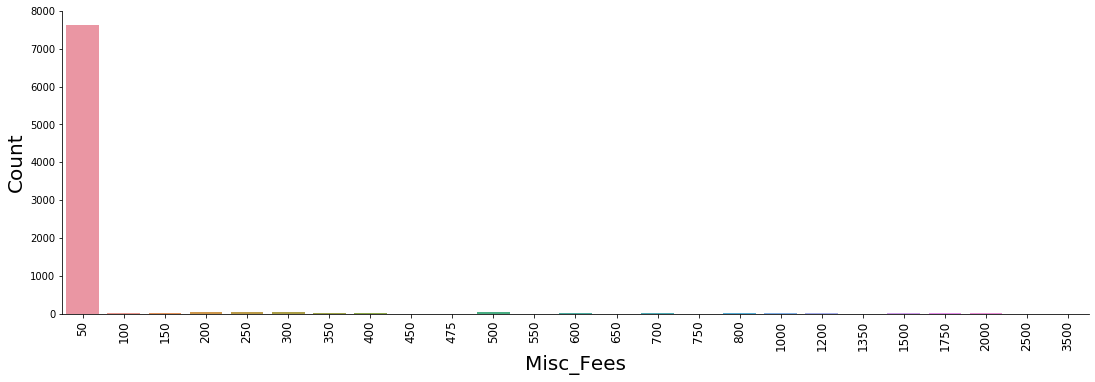

In [44]:
for i in df.drop(['Area','Feedback'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
)
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

# Information from the Graph:           

1) Most of the doctors have 9 years of experience.
2) Maximun doctors taking 100 rupees fees.
3) Most of the doctors are Dentish profession.
4) Most of the doctors gets 100 rating.
5) Most of the doctors are from banglore.

# Bivarient Analysis

In [45]:
#Separate categorical and numberical columns
obj_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

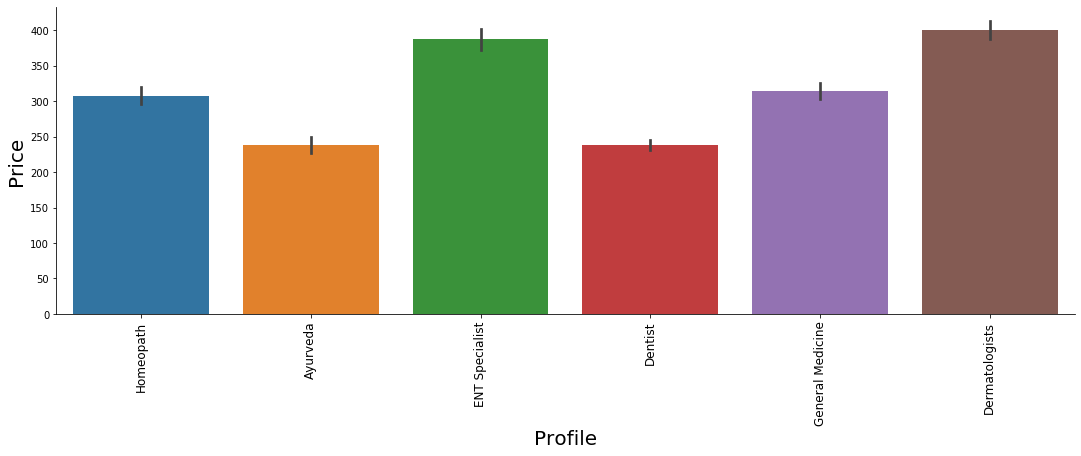

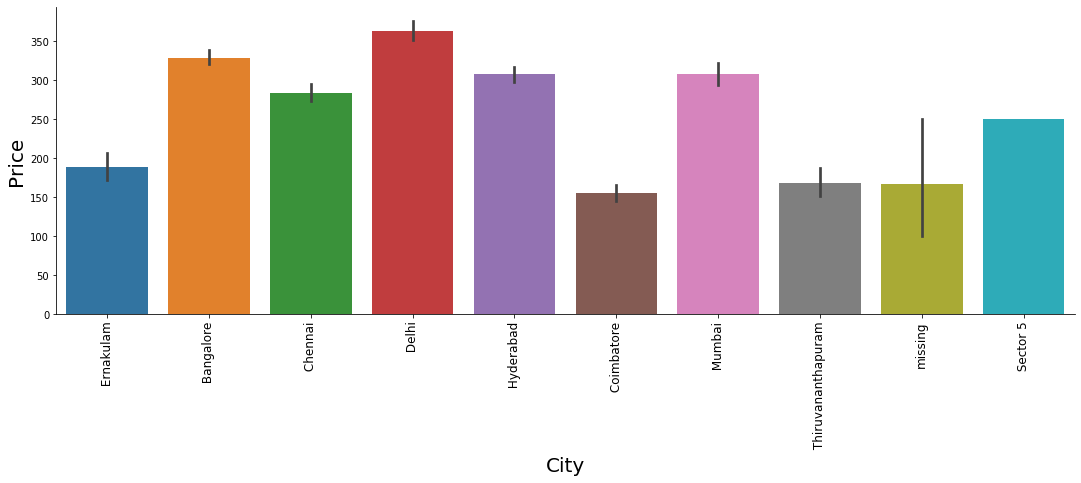

In [47]:
#Profile ,City v/s target
for i in ['Profile','City']:
    sns.catplot(x=i,
                data=df,
                y='Fees',
                height=5,
                aspect=3,
               kind='bar')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Price',fontsize=20)
    plt.xlabel(i,fontsize=20)

# Information from the Graph:           

1) Doctores from Deematologistis profession charges the most as compared to other specification.
2) In Delhi doctors charges the most.

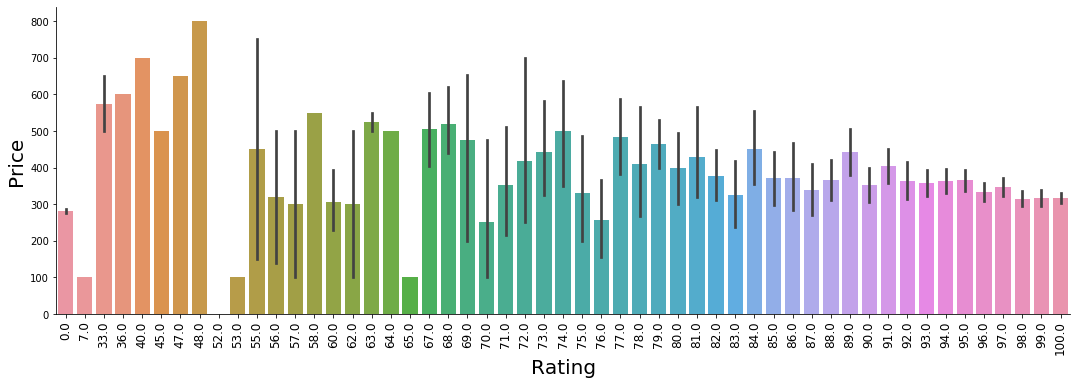

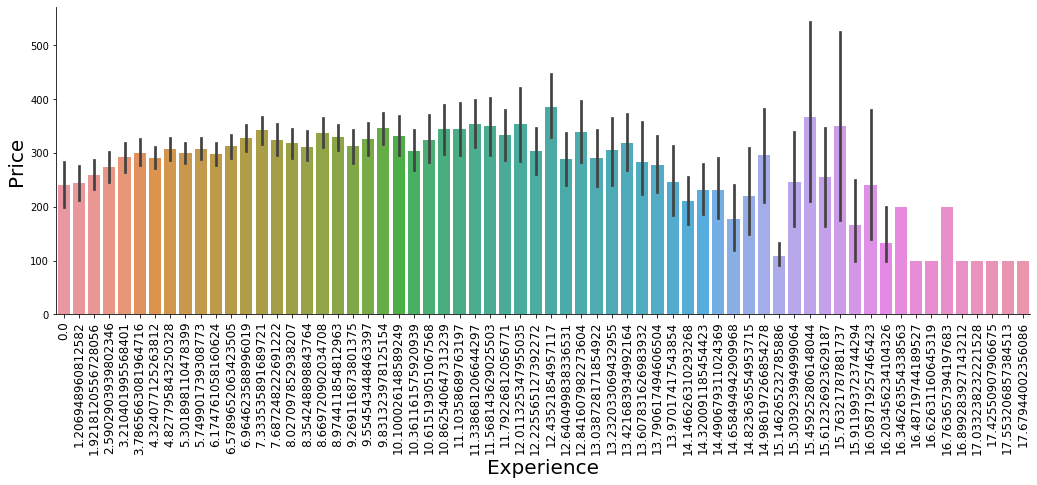

In [84]:
for i in ['Rating','Experience']:
    sns.catplot(x=i,
                data=df,
                y='Fees',
                height=5,
                aspect=3,
               kind='bar')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Price',fontsize=20)
    plt.xlabel(i,fontsize=20)

# Information from the Graph:           

1) As experience increases doctors price also increases.
2) More rating of doctors  charges more as compared to low rating.

In [49]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in obj_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Experience,Fees,Profile,Rating,dataset,Area,City,ayurveda_bams,ayurveda_ms,ayurveda_md,...,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Feedback,Misc_Fees
0,24,100.0,5,100.0,1,324,4,0,0,0,...,0,0,0,0,0,0,0,0,16,50
1,12,350.0,0,98.0,1,925,0,1,0,1,...,0,0,0,0,0,0,0,0,76,50
2,9,300.0,3,0.0,1,494,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
3,12,250.0,0,0.0,1,74,0,1,0,0,...,0,0,0,0,0,0,0,0,0,250
4,20,250.0,0,100.0,1,367,1,1,0,0,...,0,0,0,0,0,0,0,0,4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,10,NaN,0,0.0,0,76,0,1,0,0,...,0,0,0,0,0,0,0,0,0,50
7944,4,NaN,2,0.0,0,135,1,0,0,0,...,0,0,0,0,0,0,0,0,0,50
7945,9,NaN,4,0.0,0,658,1,0,0,0,...,0,0,0,1,0,0,0,0,0,50
7946,12,NaN,1,98.0,0,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50


In [50]:
#Checking skewness
df.skew()

Experience                 0.993071 
Fees                       0.746366 
Profile                    0.085763 
Rating                     0.230069 
dataset                   -1.153556 
Area                       0.103471 
City                       0.045883 
ayurveda_bams              2.252769 
ayurveda_ms                11.859269
ayurveda_md                5.796643 
dentist_bds                1.311129 
dentist_mds                2.245864 
dentist_orthodontics       6.059968 
dentist_periodontics       7.632548 
dentist_prosthodontics     6.700672 
dentist_oralandmaxi        7.394644 
dentist_cosmetic           22.152899
dermatology_md             2.503053 
dermatology_venereology    3.108843 
dermatology_leprosy        3.137908 
dermatology_dnb            6.880235 
dermatology_cosmetic       26.742890
ent_ms                     2.965816 
ent_otorhinolaryngology    3.667960 
ent_oncology               21.487367
homeopath_bhms             2.271943 
homeopath_dhms             10.887867
h

In [51]:
#lets remove the skewness
for i in df.drop(['Fees'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])
#Check again after removing skewness
df.skew()

Experience                 0.195753 
Fees                       0.746366 
Profile                    0.085763 
Rating                     0.230069 
dataset                   -1.153556 
Area                       0.103471 
City                       0.045883 
ayurveda_bams              2.252769 
ayurveda_ms                11.859269
ayurveda_md                5.796643 
dentist_bds                1.311129 
dentist_mds                2.245864 
dentist_orthodontics       6.059968 
dentist_periodontics       7.632548 
dentist_prosthodontics     6.700672 
dentist_oralandmaxi        7.394644 
dentist_cosmetic           22.152899
dermatology_md             2.503053 
dermatology_venereology    3.108843 
dermatology_leprosy        3.137908 
dermatology_dnb            6.880235 
dermatology_cosmetic       26.742890
ent_ms                     2.965816 
ent_otorhinolaryngology    3.667960 
ent_oncology               21.487367
homeopath_bhms             2.271943 
homeopath_dhms             10.887867
h

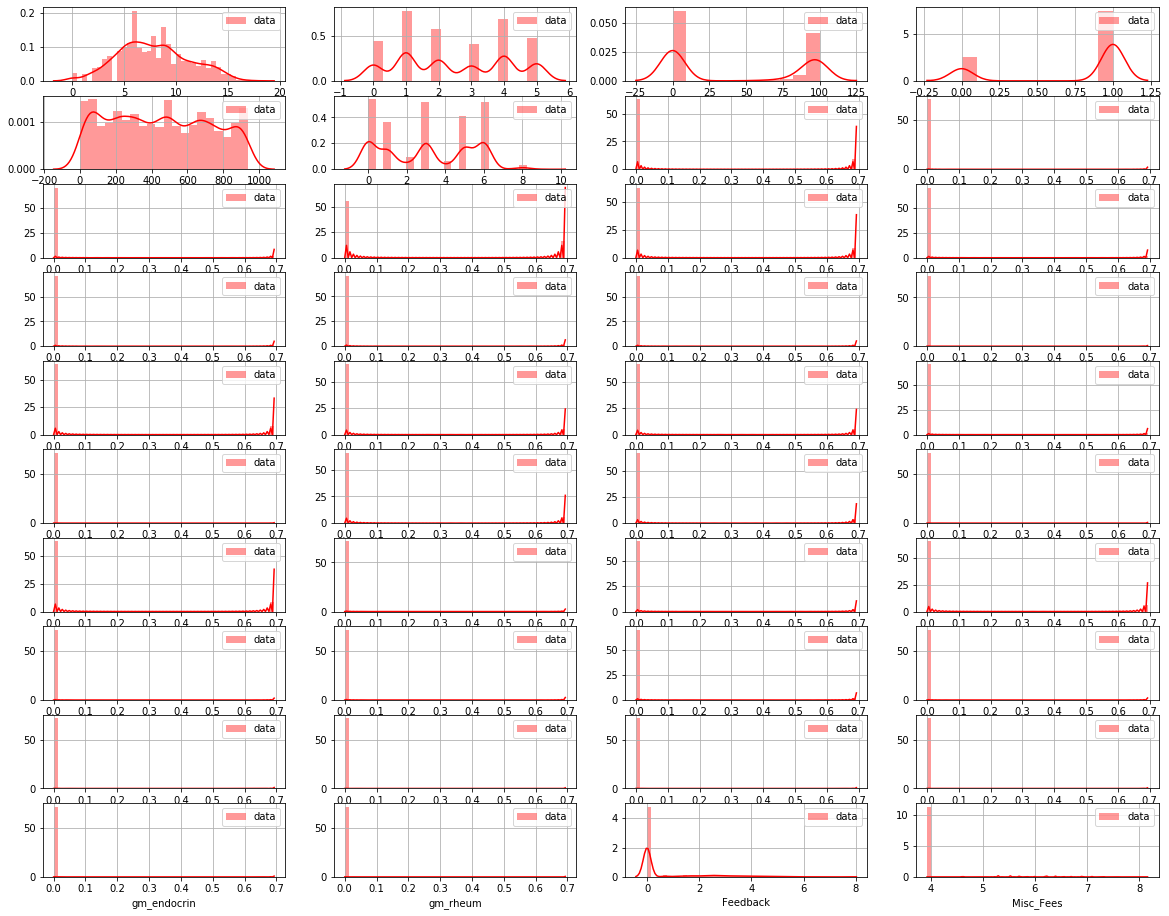

In [52]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.drop(['Fees'],axis=1).columns.values)):
    plt.subplot(10,4,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [53]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

(41.0, 0.0)

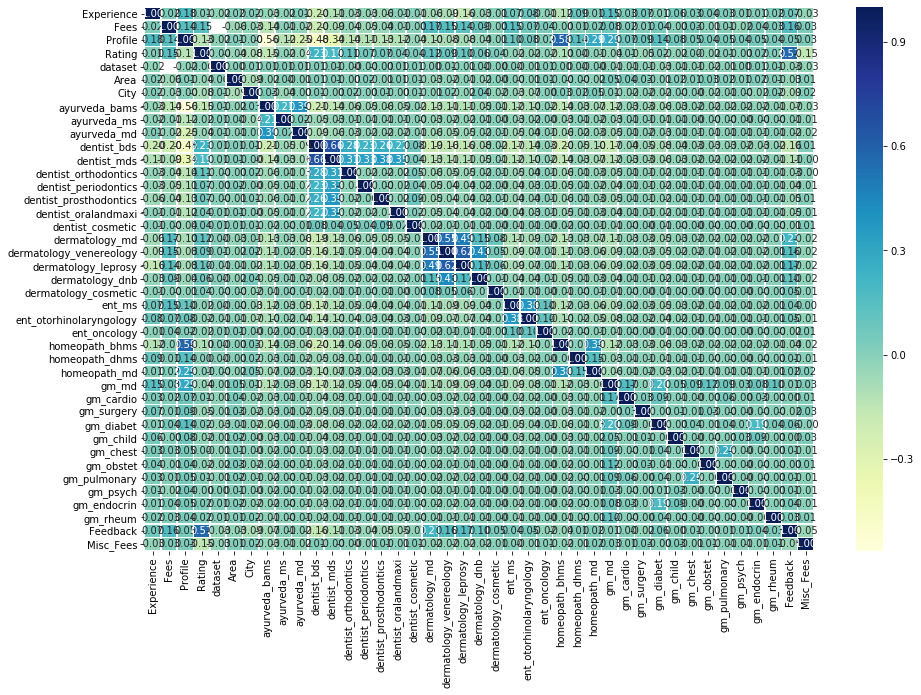

In [54]:
# Plotting Heatmap for Correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling


In [55]:
# Lets seprate the train and test from df ( here dataset= 1 for train) and (dataset=0) for test sets...
# df_train(train) where 1 = train
df_train=df.loc[df["dataset"]==1]
#In df_test(test) where = test
df_test=df.loc[df["dataset"]==0]

In [56]:
#re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [57]:
#Lets drop "Price" and "dataset" columns from the test dataset
#Also droping "dataset" columns from the train dataset
df_test.drop(columns=["Fees","dataset"],inplace=True)
df_train.drop(columns=["dataset"],inplace=True)

In [58]:
#lets divide the df_train into input and output
X = df_train.drop("Fees", axis=1)

y = df_train["Fees"]

In [59]:
# Independent variables (no target column)
X.head()

,Experience,Profile,Rating,Area,City,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,...,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Feedback,Misc_Fees
0,10.361162,5,100.0,324,4,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833213,3.931826
1,6.578965,0,98.0,925,0,0.693147,0.0,0.693147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.343805,3.931826
2,5.301898,3,0.0,494,0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.931826
3,6.578965,0,0.0,74,0,0.693147,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.525453
4,9.269117,0,100.0,367,1,0.693147,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,3.931826


In [60]:
# Target variable
y


0       100.0
1       350.0
2       300.0
3       250.0
4       250.0
        ...  
5956    300.0
5957    100.0
5958    600.0
5959    100.0
5960    200.0
Name: Fees, Length: 5921, dtype: float64

In [61]:
#checking shape of input variable
X.shape

(5921, 39)

In [62]:
#checking shape of target variable
y.shape

(5921,)

In [63]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,Experience,Profile,Rating,Area,City,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,...,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Feedback,Misc_Fees
0,0.748791,1.539642,1.213827,-0.443830,0.398326,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,1.494490,-0.172709
1,-0.367750,-1.472590,1.171605,1.724387,-1.321942,2.615795,-0.087512,5.869846,-0.545016,-0.383742,...,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,2.575451,-0.172709
2,-0.744752,0.334749,-0.897267,0.169476,-1.321942,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,-0.532922,-0.172709
3,-0.367750,-1.472590,-0.897267,-1.345751,-1.321942,2.615795,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,-0.532922,4.020906
4,0.426409,-1.472590,1.213827,-0.288700,-0.891875,2.615795,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,0.618772,-0.172709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,0.339409,0.334749,1.171605,-1.338536,-1.321942,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,2.206806,-0.172709
5917,1.361072,0.937195,-0.897267,0.490560,-0.891875,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,-0.532922,-0.172709
5918,1.814206,0.937195,1.150494,-0.772129,-0.031741,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,1.245246,-0.172709
5919,-0.040574,0.937195,1.002718,1.663056,1.258460,-0.382293,-0.087512,-0.170362,-0.545016,-0.383742,...,-0.145651,-0.078213,-0.052054,-0.041131,-0.048683,-0.045064,-0.05522,-0.041131,-0.532922,-0.172709


In [64]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [65]:
from xgboost import XGBRegressor

models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor(),
          "lightgbm":lgb.LGBMRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.22)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [66]:
#learning scores of model
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 99 is: 0.17007198828586279
max r2 score corresponding to 70 is: 0.08214517460951887
max r2 score corresponding to 83 is: 0.16376511278916817
max r2 score corresponding to 0 is: 0
max r2 score corresponding to 66 is: 0.14118334859023196
max r2 score corresponding to 66 is: 0.254726930551893
max r2 score corresponding to 83 is: 0.16272301678638135
max r2 score corresponding to 83 is: 0.16375673000303115
max r2 score corresponding to 83 is: 0.1404788532799225
max r2 score corresponding to 70 is: 0.2523938830114856
max r2 score corresponding to 99 is: 0.2731792699774841


{'KNeighborsRegressor': 0.2130502625181606,
 'SVR': 0.06110327680309835,
 'LR': 0.1429199007020865,
 'DecisionTreeRegressor': 0.998214276226821,
 'RandomForestRegressor': 0.11728275596987325,
 'GradientBoostingClassifier': 0.2740308686475591,
 'Lasso': 0.14074588623088902,
 'Ridge': 0.1429197509887894,
 'ElasticNet': 0.12388776313014205,
 'XGBRegressor': 0.719813529982578,
 'lightgbm': 0.4861973914062729}

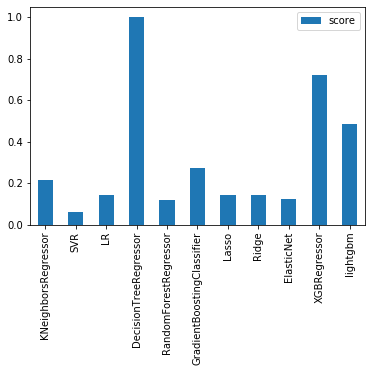

In [67]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [68]:
#Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
lgb=lgb.LGBMRegressor()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))
models.append(('lightgbm',lgb))


Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score and errors.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 52 is: 0.10251818421344872
R2 Score :  0.10251818421344872


Cross_val_score= 0.04891053835935104


Mean absolute error= 135.4380660015349


Mean squared error= 31096.44313123561


Root Mean squared error= 176.34183602093864


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 70 is: 0.08214517460951887
R2 Score :  0.08214517460951887


Cross_val_score= 0.06019227219902634


Mean absolute error= 134.26710541486744


Mean squared error= 30201.183232669693


Root Mean squared error= 173.78487630593662


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 83 is: 0.16376511278916817
R2 Score

In [69]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,10.251818,4.891054,135.438066,31096.443131,176.341836
1,SVR,8.214517,6.019227,134.267105,30201.183233,173.784876
2,LinearRegression,16.376511,13.485947,134.658733,28658.308480,169.287650
3,DecisionTreeRegressor,-48.501830,-49.133249,166.358404,55005.391404,234.532282
4,RandomForestRegressor,21.574669,18.028436,129.308351,29119.391977,170.644051
5,GradientBoostingRegressor,25.452057,22.245569,131.702581,28464.934625,168.715544
6,AdaBoostRegressor,15.939185,10.419280,145.532363,31211.852175,176.668764
7,Lasso,16.272302,13.453988,134.957234,28694.021782,169.393098
8,Ridge,16.375673,13.486455,134.661528,28658.595764,169.288499
9,ElasticNet,14.047885,12.025240,137.602116,29456.343600,171.628505


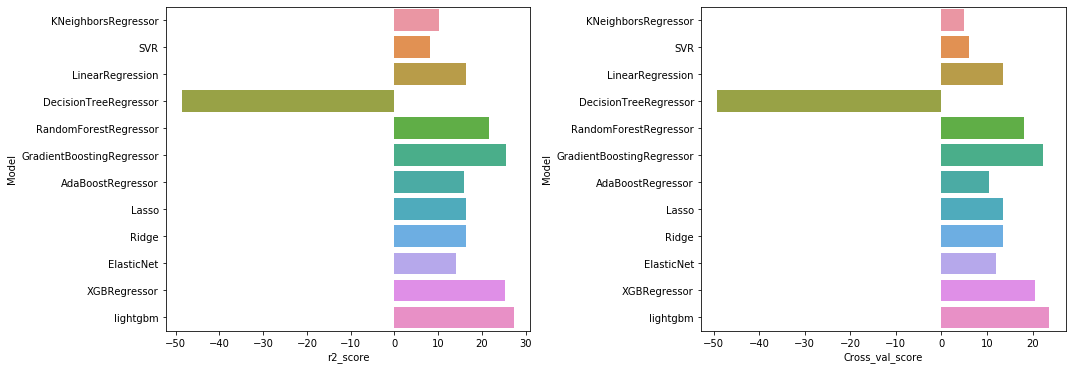

In [70]:
#Plotting bar plot of scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'r2_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [71]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV


In [72]:
#for getting best set of parameters for GradientBoostingRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid1 = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}

clfD = GradientBoostingRegressor()

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clfD,
                      param_grid=grid1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x, y);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


In [73]:
# best parameters for GradientBoostingRegressor
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'learning_rate': 0.1, 'n_estimators': 500}
score: 0.23680448126885906


In [74]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators= 500)
max_random_score(gbr)

max r2 score corresponding to 70 is: 0.2818877397332187


70

In [75]:
from xgboost import XGBRegressor
#lets use gridsearchcv to find out best parameters for XGBRegressor
grid_6 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
clf6 = XGBRegressor()

# Setup GridSearchCV
gs_clf6 = GridSearchCV(estimator=clf6,
                      param_grid=grid_6,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf6.fit(x_train, y_train);

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [76]:
# best parameters for XGBRegressor
print("Best parameter:",gs_clf6.best_params_)
print("score:",gs_clf6.best_score_)

Best parameter: {'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 1}
score: 0.23434358535969854


In [79]:
#checking r2 score using best parameters which calculated from gridsearchCV
xgb=XGBRegressor(colsample_bytree= 0.4, gamma= 0.0, learning_rate= 0.15, max_depth= 5, min_child_weight= 1)
max_random_score(xgb)

max r2 score corresponding to 70 is: 0.27745456863351514


70

In [92]:
import lightgbm as lgb
#lets use gridsearchcv to find out best parameters for LGBMRegressor
grid_lgb = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
clflgb =lgb.LGBMRegressor(silent=False)

# Setup GridSearchCV
gs_clflgb = GridSearchCV(estimator=clflgb,
                      param_grid=grid_lgb,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clflgb.fit(x_train, y_train);

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   34.1s finished


In [93]:
# best parameters for LGBMRegressor
print("Best parameter:",gs_clflgb.best_params_)
print("score:",gs_clflgb.best_score_)

Best parameter: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 200, 'num_leaves': 300}
score: 0.20903284930356766


In [97]:
#checking r2 score using best parameters and scores which calculated from gridsearchCV
import lightgbm as lgb

lgbr=lgb.LGBMRegressor(silent=False,learning_rate=0.01 ,max_depth=50, n_estimators=200 , num_leaves=300)
max_random_score(lgbr)

max r2 score corresponding to 99 is: 0.23645272758938274


99

In [82]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500,700, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x_train, y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.2min finished


In [85]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1000}
score: 0.18790314553877235


In [87]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=1000,max_depth=10, min_samples_leaf= 1, max_features= 'auto',min_samples_split=6)
max_random_score(rf)

max r2 score corresponding to 99 is: 0.2459701218004271


99

# After all this process conclusion is that XGBRegressor and LGBMRegressor is performing well.lets differentiate them further by compaing their errors

In [98]:
#LGBMRegressor
import lightgbm as lgb
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20,random_state=99)
lgbr=lgb.LGBMRegressor()
lgbr.fit(x_train, y_train)
y_predlgbr = lgbr.predict(x_test)
evaluate_preds(y_test,y_predlgbr)


r2score: 26.88%
Mean absolute error: 126.54
Mean squared error: 27334.10
Root Mean squared error: 165.33


{'r2score': 0.27,
 'Mean absolute error': 126.54,
 'Mean squared error': 27334.1,
 'Root Mean squared error': 165.33}

In [89]:
#XGBRegressor
#Lets make the final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20,random_state=70)
xgb=XGBRegressor(colsample_bytree= 0.4, gamma= 0.0, learning_rate= 0.15, max_depth= 5, min_child_weight= 1)
xgb.fit(x_train, y_train)
y_predxg = xgb.predict(x_test)
evaluate_preds(y_test,y_predxg)


r2score: 27.36%
Mean absolute error: 117.27
Mean squared error: 23180.87
Root Mean squared error: 152.25


{'r2score': 0.27,
 'Mean absolute error': 117.27,
 'Mean squared error': 23180.87,
 'Root Mean squared error': 152.25}

# After all this process conclusion is that XGBRegressor is performing well because of  low rmse and high r2 score(accuracy score)


Text(0, 0.5, 'Predicted Y')

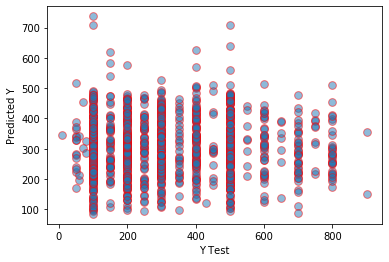

In [100]:
#plot of Y Test and Predicted Y
plt.scatter(x=y_test,y=y_predxg,marker="o",edgecolors ="r",s=60,alpha=0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [101]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predxg})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
5176,500.0,473.201691
2079,400.0,165.871185
1093,100.0,208.840744
2766,600.0,416.544220
1501,200.0,102.716171
...,...,...
1080,200.0,460.716614
63,150.0,238.222992
1245,300.0,337.296265
2859,700.0,279.557465


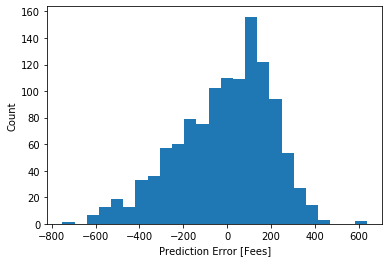

In [107]:
#lets visualize the error
error = y_predxg - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Fees]")
_ = plt.ylabel("Count")

In [108]:
#lets predict our test set (df_test)
price_pred=xgb.predict(df_test)
price_pred


array([128.57913, 128.57913, 207.69334, ..., 234.56378, 212.41869,
       406.12155], dtype=float32)

In [109]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(price_pred)
df1.to_csv('Project18_Doctors_Consultation_Fee.csv',index=False)

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Fees) 

In [110]:
# Find feature importance of our best model
xgb.feature_importances_

array([0.02626751, 0.07972197, 0.03163828, 0.0283301 , 0.04178736,
       0.04669667, 0.01171971, 0.02071006, 0.10450321, 0.02664929,
       0.00860423, 0.00629443, 0.00474804, 0.01470803, 0.00798841,
       0.04488581, 0.0590729 , 0.01887022, 0.02388516, 0.01242798,
       0.05914528, 0.01945776, 0.01430369, 0.02398833, 0.01814307,
       0.01798376, 0.03225012, 0.01920866, 0.01037935, 0.01865564,
       0.01649543, 0.01481754, 0.00666372, 0.0090863 , 0.02068845,
       0.00919476, 0.00863252, 0.01937623, 0.04201999], dtype=float32)

In [113]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=40):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

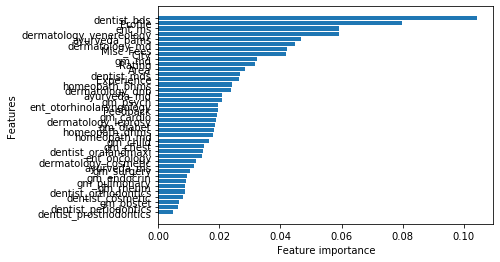

In [114]:
#bar plot of important features 
plot_features(x_train.columns, xgb.feature_importances_)

Looks like dentist_bds contribute the most.

In [115]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(xgb,'Project18_Doctors_Consultation_Fee.pkl')

['Project18_Doctors_Consultation_Fee.pkl']

In [116]:
#read the file using joblib
xg_from_joblib=joblib.load('Project18_Doctors_Consultation_Fee.pkl')
joblib_y_preds = xg_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

r2score: 42.63%
Mean absolute error: 113.27
Mean squared error: 21447.81
Root Mean squared error: 146.45


{'r2score': 0.43,
 'Mean absolute error': 113.27,
 'Mean squared error': 21447.81,
 'Root Mean squared error': 146.45}

## Conclusion:

1) Most of the doctors have 9 years of experience.
2) Maximun doctors taking 100 rupees fees.
3) Most of the doctors are Dentish profession.
4) Most of the doctors gets 100 rating.
5) Most of the doctors are from banglore. 
6) Doctores from Deematologistis profession charges the most as compared to other specification.
7) In Delhi doctors charges the most. 
8) As experience increases doctors price also increases.
9) More rating of doctors charges more as compared to low rating. 
10) Area Chankyapuri have Highest Doctor fee

## Steps Followed: 

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.
5) AUC ROC Curves are made for each model.
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
7) DecisionTreeClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.
8) Predicted values are saved in Project_17_Flight_Price_submission.csv file.
9) Pickle file is named with Project_17_Flight_price_submission.pkl

Getting linear relatipnship means that our model performes well.

In [94]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predxg})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
5877,800.0,473.201691
2023,200.0,165.871185
5759,200.0,208.840744
3450,300.0,416.544220
1276,100.0,102.716171
...,...,...
3368,500.0,460.716614
677,200.0,238.222992
5329,400.0,337.296265
956,300.0,279.557465
